# **2η ομαδική εργασία στη Τεχνολογία και Ανάλυση Εικόνων και Βίντεο**

## **Στοιχεία μελών ομάδας**

Βασίλειος Βαρσαμής - 03118033

Αλέξανδρος Κουλάκος - 03118144

## **Θεωρητικό μέρος**

**Q: Περιγράψτε τη λειτουργία της Rectified Linear Unit (ReLU).**

**A**: Η συνάρτηση ReLU ορίζεται ως $ReLU(x) = max(0, x)$, δηλαδή η έξοδος είναι ταυτοτική με την είσοδο για θετικές εισόδους και $0$ αλλιώς. Όπως φαίνεται στο παρακάτω διάγραμμα, η συνάρτηση εισάγει στο δίκτυο μια μη-γραμμικότητα στην έξοδο κάθε νευρώνα γεγονός που βοηθάει στην πιο γρήγορη σύγκλιση του σφάλματος εκπαίδευσης, δηλαδή στην πιο γρήγορη εκπαίδευση του μοντέλου. Κάποιες από τις ιδιότητες που έχουν κάνει την χρήση της διαδεδομένη στα νευρωτικά δίκτυα είναι η εύκολη υλοποίηση της, το scale invariance και η μειώση της πιθανότητας εμφάνισης του φαινομένου “vanishing gradient”.

  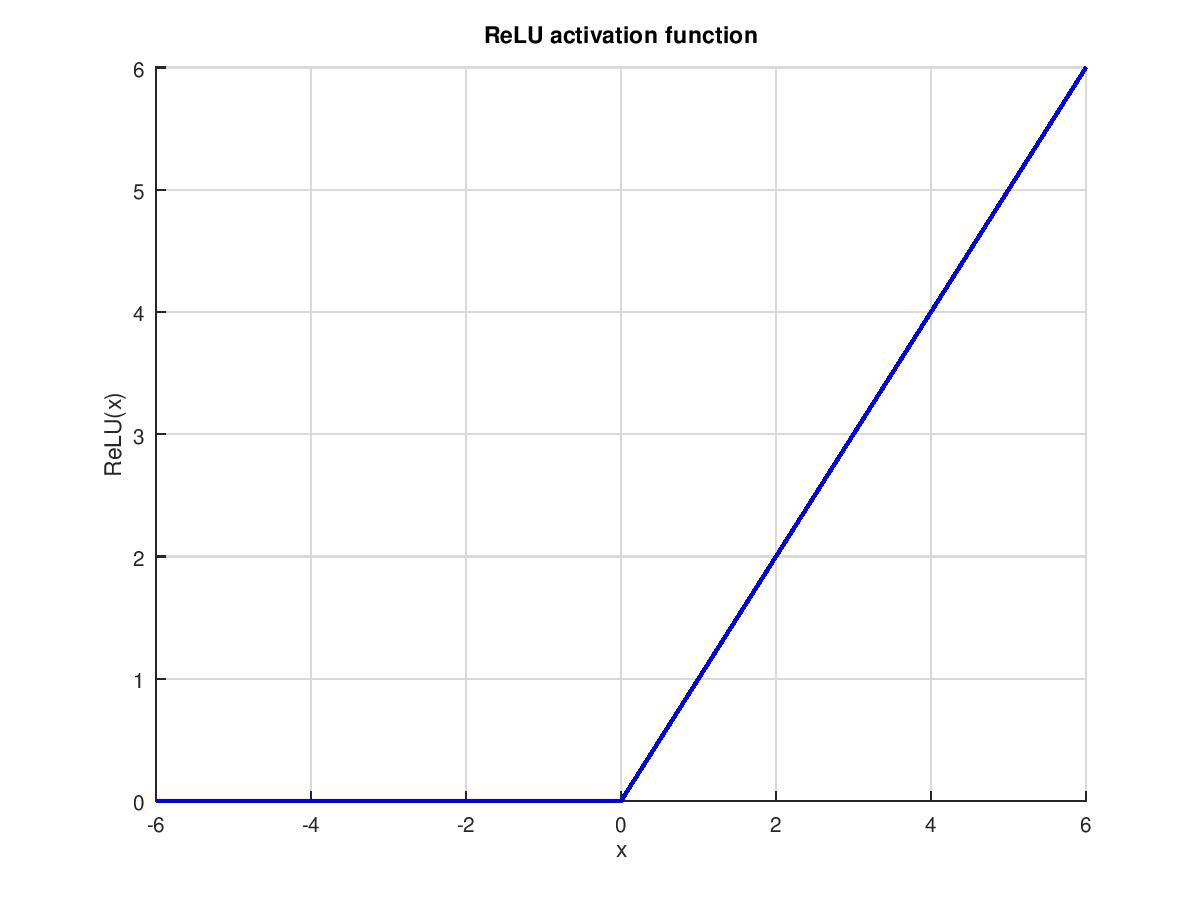


**Q: Παρουσιάστε ένα συγκριτικό πίνακα με τα επίπεδα, το μέγεθος των φίλτρων, συνάρτηση ενεργοποίησης, πλήθος παραμέτρων και τεχνικές pooling και dropout που χρησιμοποιούν τα 3 διαφορετικά δίκτυα που παρουσιάζονται στα προαναφερθέντα άρθρα και σχολιάστε επαρκώς τις διαφορές τους. Ποια χαρακτηριστικά αυτών των τριών δικτύων είναι κατά τη γνώμη σας αυτά που συνέβαλαν στη σταδιακή αύξηση της ακρίβειας ταξινόμησης;**

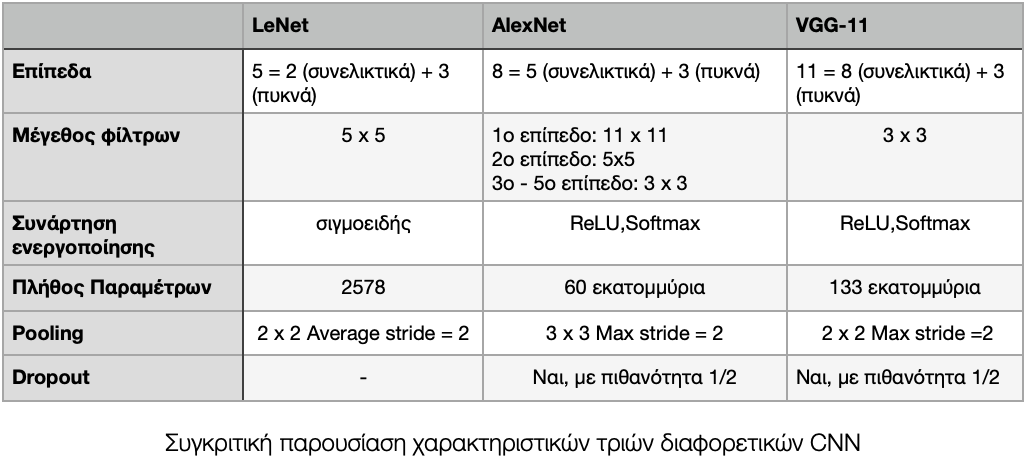

**Α**: Ο παραπάνω πίνακας περιέχει σε αύξουσα χρονολογική σειρά δημοσίευσης τα τρία CNNs.
Όπως παρατηρούμε, το πρώτο χρονολογικά (LeNet CNN) έχει πολύ πιο απλή δομή από τα άλλα δύο καθώς έχει λιγότερα επίπεδα και πολύ λιγότερες παραμέτρους (4 με 5 τάξεις μεγέθους). Επίσης, σε αυτό το δίκτυο χρησιμοποιείται η σιγμοειδής ($sigmoid$) ως συνάρτηση ενεργοποίησης, average-pooling και καμία τεχνική dropout. Στα δύο τελευταία δίκτυα η σιγμοειδής αντικαθίσταται από τη $ReLU$ και το average-pooling με το max-pooling, ενω χρησιμοποιούνται και τεχνικές dropout. Σημειώνουμε ότι η $softmax$ ως συνάρτηση ενεργοποίησης υπάρχει μόνο στο τελικό επίπεδο για να παράξει την κατανομή πιθανότητας ανάμεσα στις κλάσεις που επιστρέφει ο ταξινομητής. Οι κυριότερες διαφορές ανάμεσα στα δύο τελευταία κατά σειρά CNNs είναι: (α) το πλήθος των επιπέδων και των παραμέτρων 
(β) το σημαντικά μικρότερο μέγεθος πυρήνα που χρησιμοποιεί το τελευταίο.

Η σταδιακή αύξηση της ακρίβειας ταξινόμησης οφείλεται (σύμφωνα και με την τελευταία δημοσίευση) πρώτα απ’όλα στο πλήθος των επιπέδων. Δεύτερον, όπως παρατηρούν οι συγγραφείς της δημοσίευσης που περιέχει το VGG δίκτυο, η χρήση περισσότερων επιπέδων με πυρήνες μικρότερου μεγέθους σε σύγκριση με την χρήση λιγότερων επιπέδων με πυρήνες μεγαλύτερου μεγέθους δίνει καλύτερα αποτελέσματα.Τρίτον, η χρήση της $ReLU$ ως συνάρτησης ενεργοποίησης, όπως αναφέρεται μεταξύ άλλων και στην απάντηση του β.1 επιτυγχάνει γρηγορότερη σύγκλιση και μειώνει την πιθανότητα εμφάνισης του φαινομένου “vanishing gradient”. Τέλος, τεχνικές max-pooling και dropout επίσης βοηθoύν στην αντιμετώπιση του overfitting και του vanishing gradient. Φυσικά, πρέπει να αναφέρουμε ότι η αξιοποίηση τεχνολογιών GPUs και παραλληλοποίησης παίζει καθοριστικό ρόλο στην υπολογιστική αποτελεσματικότητα των παραπάνω μοντέλων εκμάθησης.

## **Εργαστηριακό μέρος**

### Εισαγωγή και επισκόπηση του συνόλου δεδομένων

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals # legacy compatibility

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [ ]:
# Mount Google Drive filesystem
# to access necessary files for saving and loading trained models

from google.colab import drive
drive.mount('/content/drive')

path = "/content/drive/MyDrive/Image_Video_Technology/Tasks/Task_2/"
path2 = "/content/drive/MyDrive/Task_2/"

Mounted at /content/drive


In [ ]:
# helper functions

# select from from_list elements with index in index_list
def select_from_list(from_list, index_list):
  filtered_list = [from_list[i] for i in index_list]
  return filtered_list

# append in filtered_list the index of each element of unfilterd_list if it exists in target_list
def get_ds_index(unfiliterd_list, target_list):
  index = 0
  filtered_list = []
  for i_ in unfiliterd_list:
    if i_[0] in target_list:
      filtered_list.append(index)
    index += 1
  return filtered_list


In [ ]:
# Load the entire dataset

(x_train_all, y_train_all), (x_test_all, y_test_all) = tf.keras.datasets.cifar100.load_data(label_mode='fine')

169017344/169001437 [==============================] - 13s 0us/step


In [ ]:
print("Entire train set")
print("Number of images:", x_train_all.shape[0])
print("Shape of images:", x_train_all[1].shape)

Entire train set
Number of images: 50000
Shape of images: (32, 32, 3)


In [ ]:
print("Entire test set")
print("Number of images:", x_test_all.shape[0])
print("Shape of images:", x_test_all[1].shape)

Entire test set
Number of images: 10000
Shape of images: (32, 32, 3)


Η κάθε ομάδα θα δουλέψει με διαφορετικό υποσύνολο του dataset.
Στο επόμενο κελί, αντικαταστήστε την τιμή της μεταβλητής `team_seed` με τον αριθμό που αντιστοιχεί στην ομάδας σας. 

In [ ]:
# REPLACE WITH YOUR TEAM NUMBER
team_seed = 92

In [ ]:
# select from CIFAR100 20 classes
cifar100_classes_url = "https://pastebin.com/raw/nzE1n98V"

Δημιουργούμε το μοναδικό dataset της ομάδας μας:

In [ ]:
team_classes = pd.read_csv(cifar100_classes_url, sep=',', header=None)
CIFAR100_LABELS_LIST = pd.read_csv('https://pastebin.com/raw/qgDaNggt', sep=',', header=None).astype(str).values.tolist()[0]

our_index = team_classes.iloc[team_seed, :].values.tolist()
our_classes = select_from_list(CIFAR100_LABELS_LIST, our_index)
train_index = get_ds_index(y_train_all, our_index)
test_index = get_ds_index(y_test_all, our_index)

x_train_ds = np.asarray(select_from_list(x_train_all, train_index))
y_train_ds = np.asarray(select_from_list(y_train_all, train_index))
x_test_ds = np.asarray(select_from_list(x_test_all, test_index))
y_test_ds = np.asarray(select_from_list(y_test_all, test_index))

In [ ]:
# The following piece of code maps every label in list our_index to an integer in the interval [0, 19].
# This is necessary so that each class belongs to the valid range [0, 19].

# key = label contained in list our_index
# value = integer in the interval [0, 19]

myDict = {}

for i in range(len(our_index)):
  myDict[our_index[i]] = i

In [ ]:
print(myDict)

{5: 0, 6: 1, 9: 2, 14: 3, 20: 4, 24: 5, 26: 6, 30: 7, 38: 8, 54: 9, 55: 10, 65: 11, 67: 12, 79: 13, 80: 14, 81: 15, 83: 16, 84: 17, 89: 18, 92: 19}


In [ ]:
# print our classes
print(our_classes)

[' bed', ' bee', ' bottle', ' butterfly', ' chair', ' cockroach', ' crab', ' dolphin', ' kangaroo', ' orchid', ' otter', ' rabbit', ' ray', ' spider', ' squirrel', ' streetcar', ' sweet_pepper', ' table', ' tractor', ' tulip']


In [ ]:
print("Filtered train set")
print("Number of images:", x_train_ds.shape[0])
print("Shape of images:", x_train_ds[1].shape)

Filtered train set
Number of images: 10000
Shape of images: (32, 32, 3)


In [ ]:
print("Filtered test set")
print("Number of images:", x_test_ds.shape[0])
print("Shape of images:", x_test_ds[1].shape)

Filtered test set
Number of images: 2000
Shape of images: (32, 32, 3)


Train: x = (8500, 32, 32, 3), y = (8500, 1)
Validation: x = (1500, 32, 32, 3), y = (1500, 1)
Test: x = (2000, 32, 32, 3), y = (2000, 1)


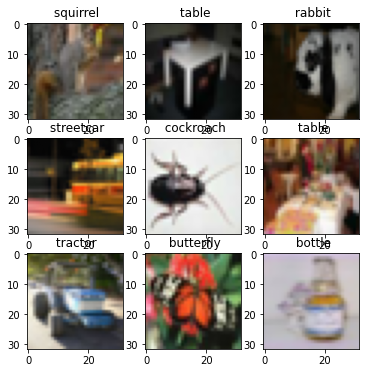

In [ ]:
# get (train) dataset dimensions
data_size, img_rows, img_cols, img_channels = x_train_ds.shape

# set validation set percentage (wrt the training set size)
validation_percentage = 0.15
val_size = round(validation_percentage * data_size)

# Reserve val_size samples for validation and normalize all values
x_val = x_train_ds[-val_size:]/255
y_val = y_train_ds[-val_size:]
x_train = x_train_ds[:-val_size]/255
y_train = y_train_ds[:-val_size]
x_test = x_test_ds/255
y_test = y_test_ds

# summarize loaded dataset
print('Train: x = %s, y = %s' % (x_train.shape, y_train.shape))
print('Validation: x = %s, y = %s' % (x_val.shape, y_val.shape))
print('Test: x = %s, y = %s' % (x_test.shape, y_test.shape))

# get class label from class index
def class_label_from_index(fine_category):
  return(CIFAR100_LABELS_LIST[fine_category.item(0)])

# plot first few images
plt.figure(figsize=(6, 6))
for i in range(9):
	# define subplot
  plt.subplot(330 + 1 + i).set_title(class_label_from_index(y_train[i]))
	# plot raw pixel data
  plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
  #show the figure
plt.show()

In [ ]:
# Store labels of train, test and validation set as numpy arrays (fit method below requires labels to have type of numpy)

y_train = np.asarray([[myDict[i[0]]] for i in y_train])
y_val = np.asarray([[myDict[i[0]]] for i in y_val])
y_test = np.asarray([[myDict[i[0]]] for i in y_test])

### Ερώτημα 1
---
#### Βήμα 1: Σχεδίαση, μεταγλώττιση και εκπαίδευση των μοντέλων

 1. Σχεδίαστε, μεταγλωττίστε και εκπαιδεύστε τα μοντέλα  **LeNet, AlexNet και  VGG**, καθώς και ένα δικό σας μοντέλο (ονομάστε το π.χ. **MyCNN**) χρησιμοποιώντας διαφορετικούς συνδυασμούς (τουλάχιστον 2 ανά μοντέλο) για [optimizer](https://keras.io/api/optimizers/), [loss](https://keras.io/api/losses/), batch size και epoch.  Για [metrics](https://keras.io/api/metrics/) να χρησιμοποιήσετε την ορθότητα (όπως στο Lab8.1).
---
  
#### Βήμα 2: Αξιολόγηση των μοντέλων

1. Για κάθε ένα από τα μοντέλα που εκπαιδεύσατε, απεικονίστε σε κοινό διάγραμμα την ορθότητα εκπαίδευσης και την ορθότητα επικύρωσης στο σύνολο των εποχών, για κάθε διαφορετικό συνδυασμό του βήματος 1 και επιλέξτε αυτό με την καλύτερη ορθότητα από κάθε μοντέλο (ένα από κάθε αρχιτεκτονική, συνολικά 4).
2. Για κάθε ένα από τα μοντέλα με την καλύτερη ορθότητα (συνολικά **4**), απεικονίστε σε κοινό διάγραμμα την ορθότητα εκπαίδευσης και την ορθότητα επικύρωσης στο σύνολο των εποχών.
3. Αξιολογήστε, αναλυτικά, τα αποτελέσματά σας ως προς τα εξής:
 - Επίδραση του πλήθους των δεδομένων/κλάσεων στην απόδοση του μοντέλου
 - Επίδραση του αλγόριθμου βελτιστοποίησης (optimizer)
 - Επίδραση του μεγέθους δέσμης (batch size)
 
---

#### Βήμα 3: Αξιολόγηση ορθότητας
Αξιολογήστε την ορθότητα για το test set σας.


#### Βήμα 1: Σχεδίαση, μεταγλώττιση και εκπαίδευση των μοντέλων

In [ ]:
# Function that saves history object returned by fit method as a file with specified name.
# In this way, history data related to loss, acc, val_loss and val_acc is persistent and 
# independent of runtime in Colab.

def save_history(history, filename):
  with open(path + filename, 'wb') as file_pi:
        pickle.dump(history, file_pi)

##### **LeNet model**

In [ ]:
# Function that designs LeNet model architecture for input_shape = (32, 32, 3)

def LeNet():
  model = models.Sequential()

  model.add(layers.Conv2D(filters=6, kernel_size=5, activation='sigmoid', padding='same', input_shape=x_train[1].shape))
  model.add(layers.AvgPool2D(pool_size=2, strides=2))
  model.add(layers.Conv2D(filters=16, kernel_size=5, activation='sigmoid'))
  model.add(layers.AvgPool2D(pool_size=2, strides=2))

  model.add(layers.Flatten())

  model.add(layers.Dense(120, activation='sigmoid'))
  model.add(layers.Dense(84, activation='sigmoid'))

  # The number of neurons in the last layer must be equal to the number of classes (that is, 20)
  model.add(layers.Dense(20))

  return model

In [ ]:
# Build and display LeNet model's full architecture

LeNet().summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_123 (Conv2D)         (None, 32, 32, 6)         456       
                                                                 
 average_pooling2d (AverageP  (None, 16, 16, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_124 (Conv2D)         (None, 12, 12, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 6, 6, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten_25 (Flatten)        (None, 576)               0         
                                                                 
 dense_75 (Dense)            (None, 120)             

Στο LeNet CNN επιλέγουμε να πειραματιστούμε με τις τιμές του **batch_size** και συγκεκριμένα δοκιμάζουμε batch_size $\in \{ 32, 64, 128 \} $.

In [ ]:
# LeNet model (batch_size = 32)
LeNetModel_1 = LeNet()

# Compile LeNet model
LeNetModel_1.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

# Train LeNet model
history_LeNet_1 = LeNetModel_1.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_val, y_val))

# Save history object persistently to file 'history_LeNet_1' that is located in Google Drive
save_history(history_LeNet_1, 'history_LeNet_1')

# Save the trained LeNet model
LeNetModel_1.save(path + 'LeNet_1.h5')

Epoch 1/20
266/266 [==============================] - 2s 6ms/step - loss: 3.0093 - accuracy: 0.0535 - val_loss: 2.9986 - val_accuracy: 0.0487
Epoch 2/20
266/266 [==============================] - 1s 5ms/step - loss: 2.8291 - accuracy: 0.1221 - val_loss: 2.7045 - val_accuracy: 0.1607
Epoch 3/20
266/266 [==============================] - 1s 4ms/step - loss: 2.6017 - accuracy: 0.1875 - val_loss: 2.5383 - val_accuracy: 0.1993
Epoch 4/20
266/266 [==============================] - 1s 5ms/step - loss: 2.4623 - accuracy: 0.2367 - val_loss: 2.4744 - val_accuracy: 0.2307
Epoch 5/20
266/266 [==============================] - 1s 5ms/step - loss: 2.3774 - accuracy: 0.2586 - val_loss: 2.4156 - val_accuracy: 0.2420
Epoch 6/20
266/266 [==============================] - 1s 5ms/step - loss: 2.3301 - accuracy: 0.2739 - val_loss: 2.3600 - val_accuracy: 0.2600
Epoch 7/20
266/266 [==============================] - 1s 5ms/step - loss: 2.2861 - accuracy: 0.2895 - val_loss: 2.3303 - val_accuracy: 0.2727
Epoch 

In [ ]:
# LeNet model (batch_size = 64)
LeNetModel_2 = LeNet()

# Compile LeNet model
LeNetModel_2.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

# Train LeNet model
history_LeNet_2 = LeNetModel_2.fit(x_train, y_train, epochs=20, batch_size=64, validation_data=(x_val, y_val))

# Save history object persistently to file 'history_LeNet_2' that is located in Google Drive
save_history(history_LeNet_2, 'history_LeNet_2')

# Save the trained LeNet model
LeNetModel_2.save(path + 'LeNet_2.h5')

Epoch 1/20
133/133 [==============================] - 1s 6ms/step - loss: 3.0144 - accuracy: 0.0521 - val_loss: 3.0079 - val_accuracy: 0.0540
Epoch 2/20
133/133 [==============================] - 1s 4ms/step - loss: 2.9781 - accuracy: 0.0681 - val_loss: 2.8902 - val_accuracy: 0.0873
Epoch 3/20
133/133 [==============================] - 1s 5ms/step - loss: 2.7746 - accuracy: 0.1434 - val_loss: 2.6956 - val_accuracy: 0.1827
Epoch 4/20
133/133 [==============================] - 1s 4ms/step - loss: 2.6326 - accuracy: 0.1878 - val_loss: 2.6325 - val_accuracy: 0.1880
Epoch 5/20
133/133 [==============================] - 1s 4ms/step - loss: 2.5452 - accuracy: 0.2139 - val_loss: 2.5516 - val_accuracy: 0.1953
Epoch 6/20
133/133 [==============================] - 1s 4ms/step - loss: 2.4826 - accuracy: 0.2413 - val_loss: 2.5124 - val_accuracy: 0.2227
Epoch 7/20
133/133 [==============================] - 1s 5ms/step - loss: 2.4301 - accuracy: 0.2488 - val_loss: 2.4547 - val_accuracy: 0.2300
Epoch 

In [ ]:
# LeNet model (batch_size = 128)
LeNetModel_3 = LeNet()

# Compile LeNet model
LeNetModel_3.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

# Train LeNet model
history_LeNet_3 = LeNetModel_3.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_val, y_val))

# Save history object persistently to file 'history_LeNet_3' that is located in Google Drive
save_history(history_LeNet_3, 'history_LeNet_3')

# Save the trained LeNet model
LeNetModel_3.save(path + 'LeNet_3.h5')

Epoch 1/20
67/67 [==============================] - 1s 8ms/step - loss: 3.0158 - accuracy: 0.0428 - val_loss: 2.9999 - val_accuracy: 0.0547
Epoch 2/20
67/67 [==============================] - 0s 5ms/step - loss: 2.9984 - accuracy: 0.0495 - val_loss: 2.9839 - val_accuracy: 0.0807
Epoch 3/20
67/67 [==============================] - 0s 5ms/step - loss: 2.9179 - accuracy: 0.0951 - val_loss: 2.8433 - val_accuracy: 0.1080
Epoch 4/20
67/67 [==============================] - 0s 5ms/step - loss: 2.7826 - accuracy: 0.1478 - val_loss: 2.7380 - val_accuracy: 0.1720
Epoch 5/20
67/67 [==============================] - 0s 5ms/step - loss: 2.6775 - accuracy: 0.1755 - val_loss: 2.6621 - val_accuracy: 0.1840
Epoch 6/20
67/67 [==============================] - 0s 5ms/step - loss: 2.6163 - accuracy: 0.1951 - val_loss: 2.6238 - val_accuracy: 0.1800
Epoch 7/20
67/67 [==============================] - 0s 5ms/step - loss: 2.5812 - accuracy: 0.2064 - val_loss: 2.6016 - val_accuracy: 0.1840
Epoch 8/20
67/67 [==

##### **AlexNet model**

In [ ]:
# Function that designs AlexNet model's architecture for input_shape = (32, 32, 3)

def AlexNet():
  model = models.Sequential()

  # Extra layer used to resize input image, so that dimension of intermediate output images remains greater than or equal to zero
  model.add(layers.experimental.preprocessing.Resizing(224, 224, interpolation="bilinear", input_shape=x_train[1].shape))

  model.add(layers.Conv2D(filters=96, kernel_size=11, strides=4, activation='relu'))
  model.add(layers.MaxPool2D(pool_size=3, strides=2))
  model.add(layers.Conv2D(filters=256, kernel_size=5, padding='same', activation='relu'))
  model.add(layers.MaxPool2D(pool_size=3, strides=2))
  model.add(layers.Conv2D(filters=384, kernel_size=3, padding='same', activation='relu'))
  model.add(layers.Conv2D(filters=384, kernel_size=3, padding='same', activation='relu'))
  model.add(layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
  model.add(layers.MaxPool2D(pool_size=3, strides=2))

  model.add(layers.Flatten())

  model.add(layers.Dense(4096, activation='relu'))
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(4096, activation='relu'))
  model.add(layers.Dropout(0.5))

  # The number of neurons in the last layer must be equal to the number of classes (that is, 20)
  model.add(layers.Dense(20))

  return model

In [ ]:
# Build and display AlexNet model's full architecture

AlexNet().summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing_2 (Resizing)       (None, 224, 224, 3)       0         
                                                                 
 conv2d_131 (Conv2D)         (None, 54, 54, 96)        34944     
                                                                 
 max_pooling2d_116 (MaxPooli  (None, 26, 26, 96)       0         
 ng2D)                                                           
                                                                 
 conv2d_132 (Conv2D)         (None, 26, 26, 256)       614656    
                                                                 
 max_pooling2d_117 (MaxPooli  (None, 12, 12, 256)      0         
 ng2D)                                                           
                                                                 
 conv2d_133 (Conv2D)         (None, 12, 12, 384)     

Στο AlexNet CNN επιλέγουμε να πειραματιστούμε με τις τιμές του **epochs** και συγκεκριμένα δοκιμάζουμε epochs $\in \{ 10, 20, 30 \}$.

In [ ]:
# AlexNet model (epochs = 10)
AlexNetModel_1 = AlexNet()

# Compile AlexNet model
AlexNetModel_1.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

# Train AlexNet model
history_AlexNet_1 = AlexNetModel_1.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_val, y_val))

# Save history object persistently to file 'history_AlexNet_1' that is located in Google Drive
save_history(history_AlexNet_1, 'history_AlexNet_1')

# Save the trained LeNet model
AlexNetModel_1.save(path + 'AlexNet_1.h5')

Epoch 1/10
67/67 [==============================] - 12s 137ms/step - loss: 3.0439 - accuracy: 0.0726 - val_loss: 2.9011 - val_accuracy: 0.0960
Epoch 2/10
67/67 [==============================] - 8s 113ms/step - loss: 2.7501 - accuracy: 0.1428 - val_loss: 2.6204 - val_accuracy: 0.1607
Epoch 3/10
67/67 [==============================] - 8s 113ms/step - loss: 2.4702 - accuracy: 0.2147 - val_loss: 2.3833 - val_accuracy: 0.2393
Epoch 4/10
67/67 [==============================] - 7s 111ms/step - loss: 2.3055 - accuracy: 0.2753 - val_loss: 2.2605 - val_accuracy: 0.2940
Epoch 5/10
67/67 [==============================] - 7s 110ms/step - loss: 2.1403 - accuracy: 0.3329 - val_loss: 2.0729 - val_accuracy: 0.3487
Epoch 6/10
67/67 [==============================] - 7s 109ms/step - loss: 1.9776 - accuracy: 0.3792 - val_loss: 2.0920 - val_accuracy: 0.3620
Epoch 7/10
67/67 [==============================] - 7s 108ms/step - loss: 1.8555 - accuracy: 0.4178 - val_loss: 1.8916 - val_accuracy: 0.4000
Epoch

In [ ]:
# AlexNet model (epochs = 20)
AlexNetModel_2 = AlexNet()

# Compile AlexNet model
AlexNetModel_2.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

# Train AlexNet model
history_AlexNet_2 = AlexNetModel_2.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_val, y_val))

# Save history object persistently to file 'history_AlexNet_2' that is located in Google Drive
save_history(history_AlexNet_2, 'history_AlexNet_2')

# Save the trained LeNet model
AlexNetModel_2.save(path + 'AlexNet_2.h5')

Epoch 1/20
67/67 [==============================] - 8s 114ms/step - loss: 3.0410 - accuracy: 0.0555 - val_loss: 3.0047 - val_accuracy: 0.0407
Epoch 2/20
67/67 [==============================] - 7s 107ms/step - loss: 2.9977 - accuracy: 0.0486 - val_loss: 2.9971 - val_accuracy: 0.0453
Epoch 3/20
67/67 [==============================] - 7s 107ms/step - loss: 2.9963 - accuracy: 0.0505 - val_loss: 2.9972 - val_accuracy: 0.0407
Epoch 4/20
67/67 [==============================] - 7s 108ms/step - loss: 2.9962 - accuracy: 0.0474 - val_loss: 2.9975 - val_accuracy: 0.0407
Epoch 5/20
67/67 [==============================] - 7s 109ms/step - loss: 2.9963 - accuracy: 0.0469 - val_loss: 2.9972 - val_accuracy: 0.0440
Epoch 6/20
67/67 [==============================] - 7s 108ms/step - loss: 2.9961 - accuracy: 0.0501 - val_loss: 2.9972 - val_accuracy: 0.0420
Epoch 7/20
67/67 [==============================] - 7s 107ms/step - loss: 2.9960 - accuracy: 0.0469 - val_loss: 2.9972 - val_accuracy: 0.0420
Epoch 

In [ ]:
# AlexNet model (epochs = 30)
AlexNetModel_3 = AlexNet()

# Compile AlexNet model
AlexNetModel_3.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

# Train AlexNet model
history_AlexNet_3 = AlexNetModel_3.fit(x_train, y_train, epochs=30, batch_size=128, validation_data=(x_val, y_val))

# Save history object persistently to file 'history_AlexNet_3' that is located in Google Drive
save_history(history_AlexNet_3, 'history_AlexNet_3')

# Save the trained LeNet model
AlexNetModel_3.save(path + 'AlexNet_3.h5')

Epoch 1/30
67/67 [==============================] - 8s 110ms/step - loss: 3.0040 - accuracy: 0.0568 - val_loss: 2.9909 - val_accuracy: 0.0493
Epoch 2/30
67/67 [==============================] - 7s 112ms/step - loss: 2.8024 - accuracy: 0.1340 - val_loss: 2.6786 - val_accuracy: 0.1633
Epoch 3/30
67/67 [==============================] - 7s 110ms/step - loss: 2.5884 - accuracy: 0.2008 - val_loss: 2.4308 - val_accuracy: 0.2333
Epoch 4/30
67/67 [==============================] - 7s 112ms/step - loss: 2.3345 - accuracy: 0.2695 - val_loss: 2.2829 - val_accuracy: 0.2960
Epoch 5/30
67/67 [==============================] - 8s 112ms/step - loss: 2.1471 - accuracy: 0.3376 - val_loss: 2.1379 - val_accuracy: 0.3280
Epoch 6/30
67/67 [==============================] - 7s 111ms/step - loss: 1.9890 - accuracy: 0.3765 - val_loss: 2.0249 - val_accuracy: 0.3627
Epoch 7/30
67/67 [==============================] - 7s 109ms/step - loss: 1.8358 - accuracy: 0.4202 - val_loss: 1.9194 - val_accuracy: 0.4040
Epoch 

##### **VGG model**

In [ ]:
# Function that designs VGG-11 model's architecture for input shape = (32, 32, 3)

def VGG():
  model = models.Sequential()

  # Extra layer used to resize input image, so that dimension of intermediate output images remains greater than or equal to zero
  model.add(layers.experimental.preprocessing.Resizing(224, 224, interpolation="bilinear", input_shape=x_train[1].shape))

  model.add(layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
  model.add(layers.MaxPool2D(pool_size=2, strides=2))
  model.add(layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
  model.add(layers.MaxPool2D(pool_size=2, strides=2))
  model.add(layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
  model.add(layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
  model.add(layers.MaxPool2D(pool_size=2, strides=2))
  model.add(layers.Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
  model.add(layers.Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
  model.add(layers.MaxPool2D(pool_size=2, strides=2))
  model.add(layers.Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
  model.add(layers.Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
  model.add(layers.MaxPool2D(pool_size=2, strides=2))

  model.add(layers.Flatten())

  model.add(layers.Dense(4096, activation='relu'))
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(4096, activation='relu'))
  model.add(layers.Dropout(0.5))

  # The number of neurons in the last layer must be equal to the number of classes (that is, 20)
  model.add(layers.Dense(20, activation='softmax'))

  return model

In [ ]:
# Build and display VGG-11 model's full architecture

VGG().summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing (Resizing)         (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 256)       2

In [ ]:
# VGG model (SGD optimizer)
VGGModel_1 = VGG()

# SGD optimizer
sgd = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, decay=0.01)

# Compile VGG model
VGGModel_1.compile(optimizer='sgd', loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

# Train VGG model
history_VGG_1 = VGGModel_1.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_val, y_val))

# Save history object persistently to file 'history_VGG_1' that is located in Google Drive
save_history(history_VGG_1, 'history_VGG_1')

# Save the trained LeNet model
VGGModel_1.save(path + 'VGG_1.h5')

Epoch 1/20
266/266 [==============================] - 68s 250ms/step - loss: 2.9932 - accuracy: 0.0548 - val_loss: 2.9868 - val_accuracy: 0.0787
Epoch 2/20
266/266 [==============================] - 66s 247ms/step - loss: 2.9749 - accuracy: 0.0579 - val_loss: 2.9321 - val_accuracy: 0.0827
Epoch 3/20
266/266 [==============================] - 66s 247ms/step - loss: 2.8564 - accuracy: 0.1304 - val_loss: 2.6469 - val_accuracy: 0.1987
Epoch 4/20
266/266 [==============================] - 66s 248ms/step - loss: 2.6284 - accuracy: 0.2008 - val_loss: 2.5080 - val_accuracy: 0.2347
Epoch 5/20
266/266 [==============================] - 66s 248ms/step - loss: 2.4884 - accuracy: 0.2345 - val_loss: 2.5513 - val_accuracy: 0.2213
Epoch 6/20
266/266 [==============================] - 66s 246ms/step - loss: 2.3879 - accuracy: 0.2568 - val_loss: 2.3124 - val_accuracy: 0.2947
Epoch 7/20
266/266 [==============================] - 66s 247ms/step - loss: 2.3224 - accuracy: 0.2799 - val_loss: 2.5935 - val_ac

In [ ]:
# VGG model (Adam optimizer)
VGGModel_2 = VGG()

# Compile VGG model
VGGModel_2.compile(optimizer='adam', loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

# Train VGG model
history_VGG_2 = VGGModel_2.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_val, y_val))

# Save history object persistently to file 'history_VGG_2' that is located in Google Drive
save_history(history_VGG_2, 'history_VGG_2')

# Save the trained LeNet model
VGGModel_2.save(path + 'VGG_2.h5')

Epoch 1/20
266/266 [==============================] - 81s 243ms/step - loss: 3.0513 - accuracy: 0.0474 - val_loss: 2.9967 - val_accuracy: 0.0420
Epoch 2/20
266/266 [==============================] - 63s 237ms/step - loss: 2.9963 - accuracy: 0.0479 - val_loss: 2.9969 - val_accuracy: 0.0420
Epoch 3/20
266/266 [==============================] - 63s 236ms/step - loss: 2.9963 - accuracy: 0.0452 - val_loss: 2.9970 - val_accuracy: 0.0407
Epoch 4/20
266/266 [==============================] - 63s 236ms/step - loss: 2.9961 - accuracy: 0.0498 - val_loss: 2.9970 - val_accuracy: 0.0407
Epoch 5/20
266/266 [==============================] - 63s 237ms/step - loss: 2.9960 - accuracy: 0.0447 - val_loss: 2.9972 - val_accuracy: 0.0407
Epoch 6/20
266/266 [==============================] - 63s 237ms/step - loss: 2.9961 - accuracy: 0.0495 - val_loss: 2.9973 - val_accuracy: 0.0407
Epoch 7/20
266/266 [==============================] - 63s 237ms/step - loss: 2.9960 - accuracy: 0.0474 - val_loss: 2.9973 - val_ac

##### **MyCNN model**

In [ ]:
# Function that designs MyCNN model's architecture for input shape = (32, 32, 3)

def MyCNN():
  model = models.Sequential()

  # Extra layer used to resize input image, so that dimension of intermediate output images remains greater than or equal to zero
  # model.add(layers.experimental.preprocessing.Resizing(224, 224, interpolation="bilinear", input_shape=x_train[1].shape))

  model.add(layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu', input_shape=x_train[1].shape))
  model.add(layers.MaxPool2D(pool_size=2, strides=2))
  model.add(layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
  model.add(layers.MaxPool2D(pool_size=2, strides=2))
  model.add(layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
  model.add(layers.MaxPool2D(pool_size=2, strides=2))
  model.add(layers.Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
  model.add(layers.MaxPool2D(pool_size=2, strides=2))
  model.add(layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
  model.add(layers.MaxPool2D(pool_size=2, strides=2))
  model.add(layers.Flatten())

  model.add(layers.Dense(1024, activation='relu'))
  model.add(layers.Dense(200, activation='relu'))

  # The number of neurons in the last layer must be equal to the number of classes (that is, 20)
  model.add(layers.Dense(20, activation='softmax'))

  return model

In [ ]:
# Build and display MyCNN model's full architecture

MyCNN().summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_98 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_91 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_99 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_92 (MaxPoolin  (None, 8, 8, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_100 (Conv2D)         (None, 8, 8, 64)          36928     
                                                                 
 max_pooling2d_93 (MaxPoolin  (None, 4, 4, 64)       

Στο MyCNN επιλέγουμε να πειραματιστούμε με τις διάφορες τιμές του **loss** και συγκεκριμένα πειραματιζόμαστε με τις συναρτήσεις Sparse Categorical Crossentropy, Poisson και Kullback - Leibler Divergence ως loss functions.

In [ ]:
# MyCNN model (loss = sparce categorical crossentropy)
MyCNNModel_1 = MyCNN()

# Compile MyCNN model
MyCNNModel_1.compile(optimizer='adam', loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

# Train MyCNN model
history_MyCNN_1 = MyCNNModel_1.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_val, y_val))

# Save history object persistently to file 'history_MyCNN_1' that is located in Google Drive
save_history(history_MyCNN_1, 'history_MyCNN_1')

# Save the trained MyCNN model
MyCNNModel_1.save(path2 + 'MyCNN_1.h5')

Epoch 1/20
67/67 [==============================] - 3s 31ms/step - loss: 2.8476 - accuracy: 0.0940 - val_loss: 2.6723 - val_accuracy: 0.1313
Epoch 2/20
67/67 [==============================] - 2s 24ms/step - loss: 2.4934 - accuracy: 0.1936 - val_loss: 2.3533 - val_accuracy: 0.2487
Epoch 3/20
67/67 [==============================] - 2s 24ms/step - loss: 2.2171 - accuracy: 0.2878 - val_loss: 2.1690 - val_accuracy: 0.3013
Epoch 4/20
67/67 [==============================] - 2s 24ms/step - loss: 2.0126 - accuracy: 0.3484 - val_loss: 2.0405 - val_accuracy: 0.3373
Epoch 5/20
67/67 [==============================] - 2s 24ms/step - loss: 1.8130 - accuracy: 0.4212 - val_loss: 1.9035 - val_accuracy: 0.3960
Epoch 6/20
67/67 [==============================] - 2s 24ms/step - loss: 1.6278 - accuracy: 0.4707 - val_loss: 1.7417 - val_accuracy: 0.4380
Epoch 7/20
67/67 [==============================] - 2s 24ms/step - loss: 1.4585 - accuracy: 0.5240 - val_loss: 1.7033 - val_accuracy: 0.4640
Epoch 8/20
67

In [ ]:
# MyCNN model (loss = poisson)
MyCNNModel_2 = MyCNN()

# Compile MyCNN model
MyCNNModel_2.compile(optimizer='adam', loss=tf.keras.losses.Poisson(), metrics=['accuracy'])

# Train MyCNN model
history_MyCNN_2 = MyCNNModel_2.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_val, y_val))

# Save history object persistently to file 'history_MyCNN_2' that is located in Google Drive
save_history(history_MyCNN_2, 'history_MyCNN_2')

# Save the trained LeNet model
MyCNNModel_2.save(path + 'MyCNN_2.h5')

Epoch 1/20
67/67 [==============================] - 4s 28ms/step - loss: 28.5310 - accuracy: 0.0446 - val_loss: 28.3876 - val_accuracy: 0.0373
Epoch 2/20
67/67 [==============================] - 2s 24ms/step - loss: 28.5309 - accuracy: 0.0493 - val_loss: 28.3876 - val_accuracy: 0.0460
Epoch 3/20
67/67 [==============================] - 2s 27ms/step - loss: 28.5309 - accuracy: 0.0509 - val_loss: 28.3876 - val_accuracy: 0.0520
Epoch 4/20
67/67 [==============================] - 2s 29ms/step - loss: 28.5309 - accuracy: 0.0531 - val_loss: 28.3876 - val_accuracy: 0.0653
Epoch 5/20
67/67 [==============================] - 2s 24ms/step - loss: 28.5309 - accuracy: 0.0562 - val_loss: 28.3876 - val_accuracy: 0.0467
Epoch 6/20
67/67 [==============================] - 2s 24ms/step - loss: 28.5309 - accuracy: 0.0559 - val_loss: 28.3876 - val_accuracy: 0.0540
Epoch 7/20
67/67 [==============================] - 2s 24ms/step - loss: 28.5309 - accuracy: 0.0546 - val_loss: 28.3876 - val_accuracy: 0.0580

In [ ]:
# MyCNN model (loss = Kullback - Leibler divergence)
MyCNNModel_3 = MyCNN()

# Compile MyCNN model
MyCNNModel_3.compile(optimizer='adam', loss=tf.keras.losses.KLDivergence(), metrics=['accuracy'])

# Train MyCNN model
history_MyCNN_3 = MyCNNModel_3.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_val, y_val))

# Save history object persistently to file 'history_MyCNN_3' that is located in Google Drive
save_history(history_MyCNN_3, 'history_MyCNN_3')

# Save the trained LeNet model
MyCNNModel_3.save(path + 'MyCNN_3.h5')

Epoch 1/20
67/67 [==============================] - 3s 29ms/step - loss: 56.9756 - accuracy: 0.0602 - val_loss: 56.5994 - val_accuracy: 0.0707
Epoch 2/20
67/67 [==============================] - 2s 25ms/step - loss: 56.9753 - accuracy: 0.0629 - val_loss: 56.5994 - val_accuracy: 0.0607
Epoch 3/20
67/67 [==============================] - 2s 25ms/step - loss: 56.9753 - accuracy: 0.0601 - val_loss: 56.5994 - val_accuracy: 0.0460
Epoch 4/20
67/67 [==============================] - 2s 25ms/step - loss: 56.9753 - accuracy: 0.0582 - val_loss: 56.5994 - val_accuracy: 0.0613
Epoch 5/20
67/67 [==============================] - 2s 25ms/step - loss: 56.9753 - accuracy: 0.0518 - val_loss: 56.5994 - val_accuracy: 0.0640
Epoch 6/20
67/67 [==============================] - 2s 25ms/step - loss: 56.9753 - accuracy: 0.0531 - val_loss: 56.5994 - val_accuracy: 0.0440
Epoch 7/20
67/67 [==============================] - 2s 25ms/step - loss: 56.9753 - accuracy: 0.0574 - val_loss: 56.5994 - val_accuracy: 0.0527

#### Βήμα 2: Αξιολόγηση των μοντέλων

##### 1.

Σημειώνουμε ότι στα ακόλουθα διαγράμματα η αρίθμηση των εποχών ξεκινά από το $0$.

###### **LeNet model**

In [ ]:
# Load necessary history files regarding LeNet trained models

history_LeNet_1 = pickle.load(open(path + 'history_LeNet_1', "rb"))
history_LeNet_2 = pickle.load(open(path + 'history_LeNet_2', "rb"))
history_LeNet_3 = pickle.load(open(path + 'history_LeNet_3', "rb"))

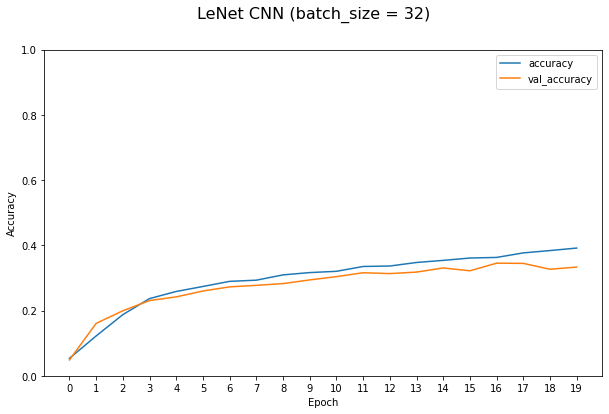

In [ ]:
# LeNetModel_1 (batch_size = 32)

# Set figure size
plt.rcParams["figure.figsize"] = (10, 6)

# Set figure title
plt.suptitle('LeNet CNN (batch_size = 32)', fontsize=16)

plt.plot(history_LeNet_1.history['accuracy'], label='accuracy')
plt.plot(history_LeNet_1.history['val_accuracy'], label ='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])

# Set scale in x axis
plt.xticks([epoch for epoch in range(20)])

plt.legend(loc='upper right')

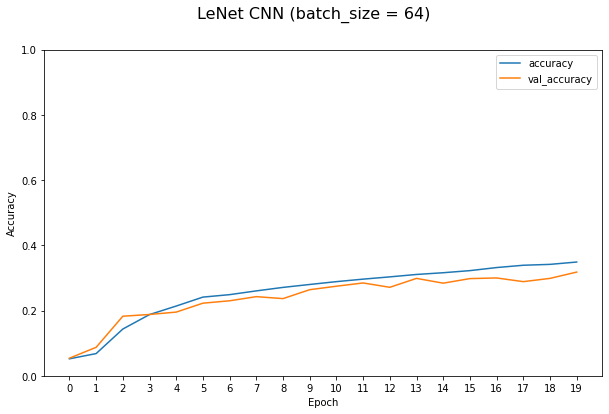

In [ ]:
# LeNetModel_2 (batch_size = 64)

# Set figure size
plt.rcParams["figure.figsize"] = (10, 6)

# Set figure title
plt.suptitle('LeNet CNN (batch_size = 64)', fontsize=16)

plt.plot(history_LeNet_2.history['accuracy'], label='accuracy')
plt.plot(history_LeNet_2.history['val_accuracy'], label ='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])

# Set scale in x axis
plt.xticks([epoch for epoch in range(20)])

plt.legend(loc='upper right')

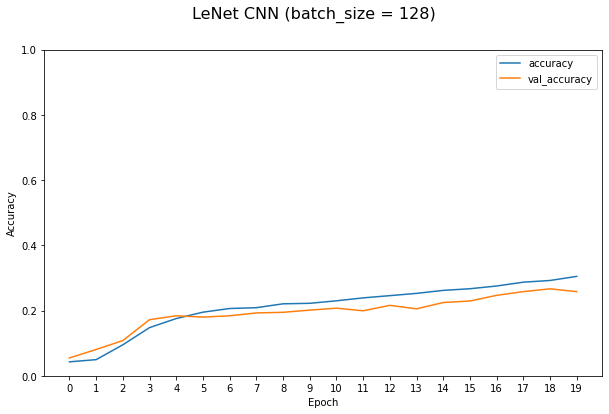

In [ ]:
# LeNetModel_3 (batch_size = 128)

# Set figure size
plt.rcParams["figure.figsize"] = (10, 6)

# Set figure title
plt.suptitle('LeNet CNN (batch_size = 128)', fontsize=16)

plt.plot(history_LeNet_3.history['accuracy'], label='accuracy')
plt.plot(history_LeNet_3.history['val_accuracy'], label ='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])

# Set scale in x axis
plt.xticks([epoch for epoch in range(20)])

plt.legend(loc='upper right')

In [ ]:
print("LeNet (batch_size = 32):  val_accuracy =", round(history_LeNet_1.history['val_accuracy'][-1], 3))
print("LeNet (batch_size = 64):  val_accuracy =", round(history_LeNet_2.history['val_accuracy'][-1], 3))
print("LeNet (batch_size = 128): val_accuracy =", round(history_LeNet_3.history['val_accuracy'][-1], 3))

LeNet (batch_size = 32):  val_accuracy = 0.333
LeNet (batch_size = 64):  val_accuracy = 0.318
LeNet (batch_size = 128): val_accuracy = 0.258


Από το παραπάνω output έχουμε ότι το μοντέλο που δίνει την καλύτερη ορθότητα είναι το LeNetModel_1 με batch_size = 32 (που είναι και το ελάχιστο batch_size για τις προσομοιώσεις που διεξάγαμε).

###### **AlexNet model**

In [ ]:
# Load necessary history files regarding AlexNet trained models

history_AlexNet_1 = pickle.load(open(path + 'history_AlexNet_1', "rb"))
history_AlexNet_2 = pickle.load(open(path + 'history_AlexNet_2', "rb"))
history_AlexNet_3 = pickle.load(open(path + 'history_AlexNet_3', "rb"))

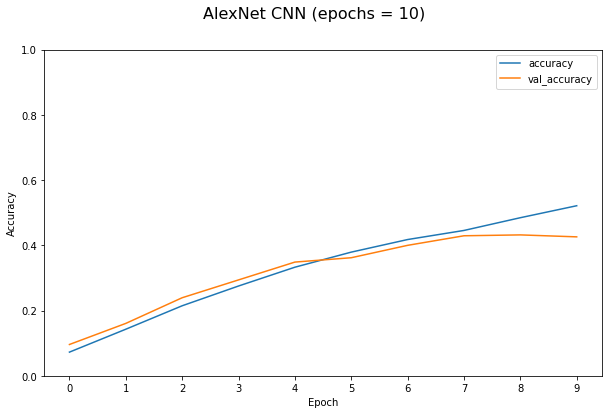

In [ ]:
# AlexNetModel_1 (epochs = 10)

# Set figure size
plt.rcParams["figure.figsize"] = (10, 6)

# Set figure title
plt.suptitle('AlexNet CNN (epochs = 10)', fontsize=16)

plt.plot(history_AlexNet_1.history['accuracy'], label='accuracy')
plt.plot(history_AlexNet_1.history['val_accuracy'], label ='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])

# Set scale in x axis
plt.xticks([epoch for epoch in range(10)])

plt.legend(loc='upper right')

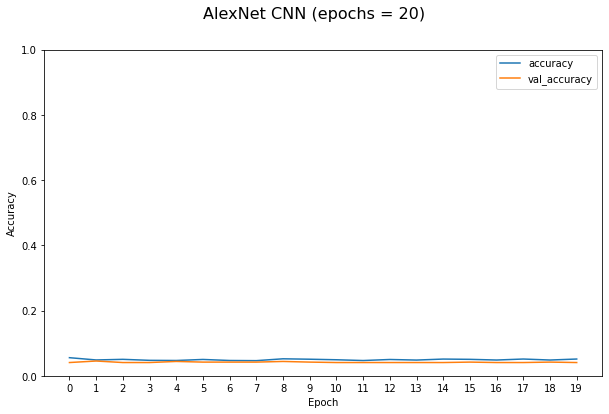

In [ ]:
# AlexNetModel_2 (epochs = 20)

# Set figure size
plt.rcParams["figure.figsize"] = (10, 6)

# Set figure title
plt.suptitle('AlexNet CNN (epochs = 20)', fontsize=16)

plt.plot(history_AlexNet_2.history['accuracy'], label='accuracy')
plt.plot(history_AlexNet_2.history['val_accuracy'], label ='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])

# Set scale in x axis
plt.xticks([epoch for epoch in range(20)])

plt.legend(loc='upper right')

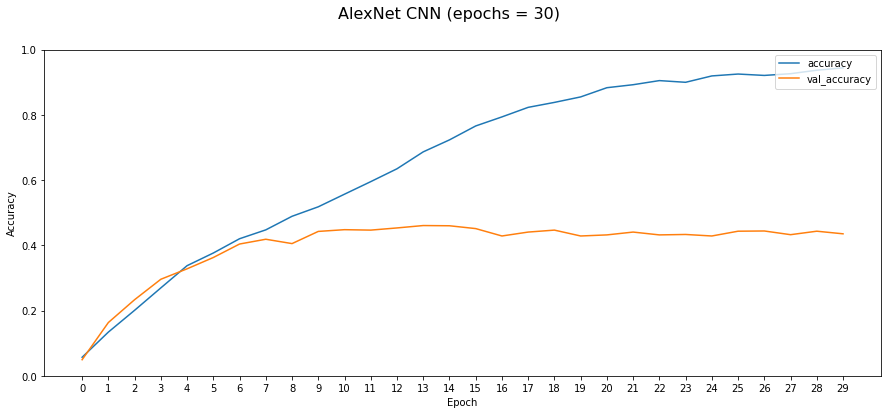

In [ ]:
# AlexNetModel_3 (epochs = 30)

# Set figure size
plt.rcParams["figure.figsize"] = (15, 6)

# Set figure title
plt.suptitle('AlexNet CNN (epochs = 30)', fontsize=16)

plt.plot(history_AlexNet_3.history['accuracy'], label='accuracy')
plt.plot(history_AlexNet_3.history['val_accuracy'], label ='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])

# Set scale in x axis
plt.xticks([epoch for epoch in range(30)])

plt.legend(loc='upper right')

In [ ]:
print("AlexNet (epochs = 10): val_accuracy =", round(history_AlexNet_1.history['val_accuracy'][-1], 3))
print("AlexNet (epochs = 20): val_accuracy =", round(history_AlexNet_2.history['val_accuracy'][-1], 3))
print("AlexNet (epochs = 20): val_accuracy =", round(history_AlexNet_3.history['val_accuracy'][-1], 3))

AlexNet (epochs = 10): val_accuracy = 0.426
AlexNet (epochs = 20): val_accuracy = 0.041
AlexNet (epochs = 20): val_accuracy = 0.435


Από το παραπάνω output έχουμε ότι το μοντέλο που δίνει την καλύτερη ορθότητα είναι το AlexNetModel_3 με epochs = 30 (που είναι και ο μέγιστος αριθμός εποχών για τις προσομοιώσεις που διεξάγαμε).

###### **VGG model**

In [ ]:
# Load necessary history files regarding VGG trained models

history_VGG_1 = pickle.load(open(path + 'history_VGG_1', "rb"))
history_VGG_2 = pickle.load(open(path + 'history_VGG_2', "rb"))

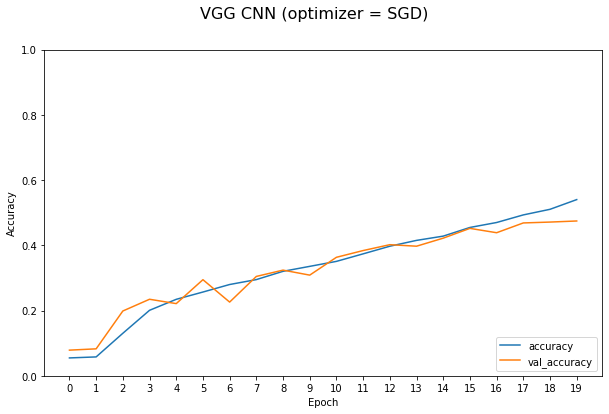

In [ ]:
# VGGModel_1 (optimizer = SGD)

# Set figure size
plt.rcParams["figure.figsize"] = (10, 6)

# Set figure title
plt.suptitle('VGG CNN (optimizer = SGD)', fontsize=16)

plt.plot(history_VGG_1.history['accuracy'], label='accuracy')
plt.plot(history_VGG_1.history['val_accuracy'], label ='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])

# Set scale in x axis
plt.xticks([epoch for epoch in range(20)])

plt.legend(loc='lower right')

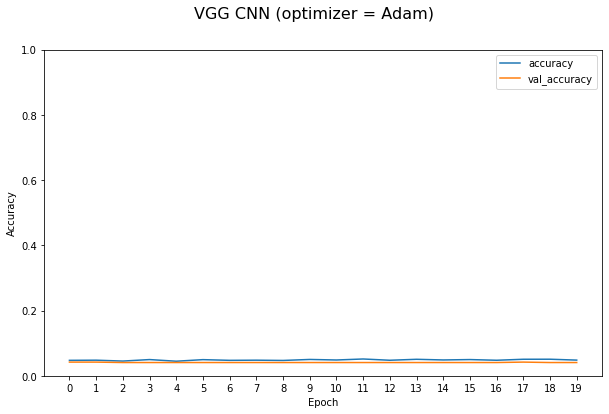

In [ ]:
# VGGModel_2 (optimizer = Adam)

# Set figure size
plt.rcParams["figure.figsize"] = (10, 6)

# Set figure title
plt.suptitle('VGG CNN (optimizer = Adam)', fontsize=16)

plt.plot(history_VGG_2.history['accuracy'], label='accuracy')
plt.plot(history_VGG_2.history['val_accuracy'], label ='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])

# Set scale in x axis
plt.xticks([epoch for epoch in range(20)])

plt.legend(loc='upper right')

In [ ]:
print("VGG (optimizer = SGD): val_accuracy =", round(history_VGG_1.history['val_accuracy'][-1], 3))
print("VGG (optimizer = Adam): val_accuracy =", round(history_VGG_2.history['val_accuracy'][-1], 3))

VGG (optimizer = SGD): val_accuracy = 0.475
VGG (optimizer = Adam): val_accuracy = 0.041


Από το παραπάνω output έχουμε ότι το μοντέλο που δίνει την καλύτερη ορθότητα είναι το VGGModel_1 με optimizer = SGD.

###### **MyCNN model**

In [ ]:
# Load necessary history files regarding MyCNN trained models

history_MyCNN_1 = pickle.load(open(path + 'history_MyCNN_1', "rb"))
history_MyCNN_2 = pickle.load(open(path + 'history_MyCNN_2', "rb"))
history_MyCNN_3 = pickle.load(open(path + 'history_MyCNN_3', "rb"))

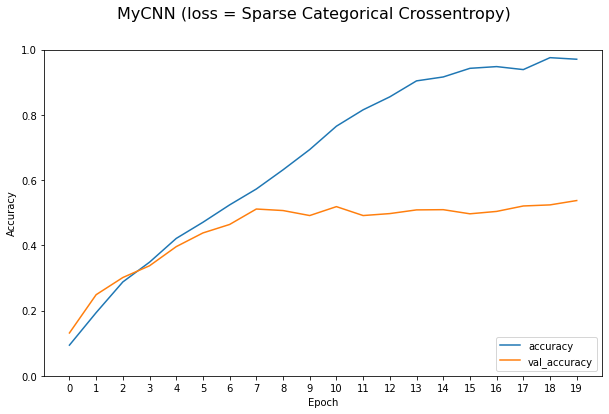

In [ ]:
# MyCNNModel_1 (loss = Sparse Categorical Crossentropy)

# Set figure size
plt.rcParams["figure.figsize"] = (10, 6)

# Set figure title
plt.suptitle('MyCNN (loss = Sparse Categorical Crossentropy)', fontsize=16)

plt.plot(history_MyCNN_1.history['accuracy'], label='accuracy')
plt.plot(history_MyCNN_1.history['val_accuracy'], label ='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])

# Set scale in x axis
plt.xticks([epoch for epoch in range(20)])

plt.legend(loc='lower right')

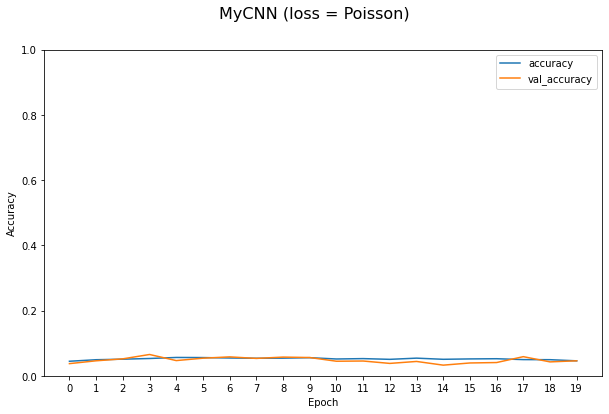

In [ ]:
# MyCNNModel_2 (loss = Poisson)

# Set figure size
plt.rcParams["figure.figsize"] = (10, 6)

# Set figure title
plt.suptitle('MyCNN (loss = Poisson)', fontsize=16)

plt.plot(history_MyCNN_2.history['accuracy'], label='accuracy')
plt.plot(history_MyCNN_2.history['val_accuracy'], label ='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])

# Set scale in x axis
plt.xticks([epoch for epoch in range(20)])

plt.legend(loc='upper right')

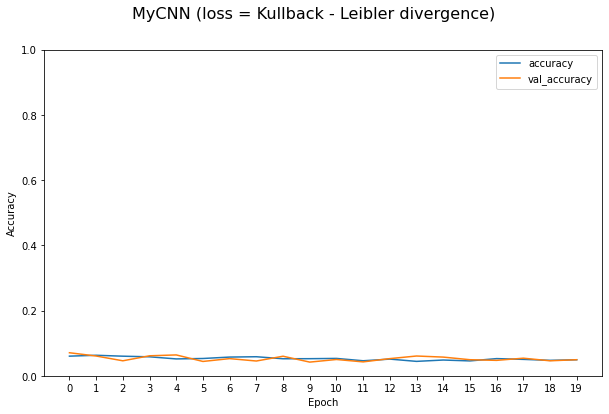

In [ ]:
# MyCNNModel_3 (loss = Kullback - Leibler divergence)

# Set figure size
plt.rcParams["figure.figsize"] = (10, 6)

# Set figure title
plt.suptitle('MyCNN (loss = Kullback - Leibler divergence)', fontsize=16)

plt.plot(history_MyCNN_3.history['accuracy'], label='accuracy')
plt.plot(history_MyCNN_3.history['val_accuracy'], label ='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])

# Set scale in x axis
plt.xticks([epoch for epoch in range(20)])

plt.legend(loc='upper right')

In [ ]:
print("MyCNN (loss = Sparse Categorical Crossentropy): val_accuracy =", round(history_MyCNN_1.history['val_accuracy'][-1], 3))
print("MyCNN (epochs = Poisson):                       val_accuracy =", round(history_MyCNN_2.history['val_accuracy'][-1], 3))
print("MyCNN (loss = Kullback - Leibler divergence):   val_accuracy =", round(history_MyCNN_3.history['val_accuracy'][-1], 3))

MyCNN (loss = Sparse Categorical Crossentropy): val_accuracy = 0.537
MyCNN (epochs = Poisson):                       val_accuracy = 0.046
MyCNN (loss = Kullback - Leibler divergence):   val_accuracy = 0.049


Από το παραπάνω output έχουμε ότι το μοντέλο που δίνει την καλύτερη ορθότητα είναι το MyCNNModel_1 με loss = Sparse Categorical Crossentropy.

##### 2.

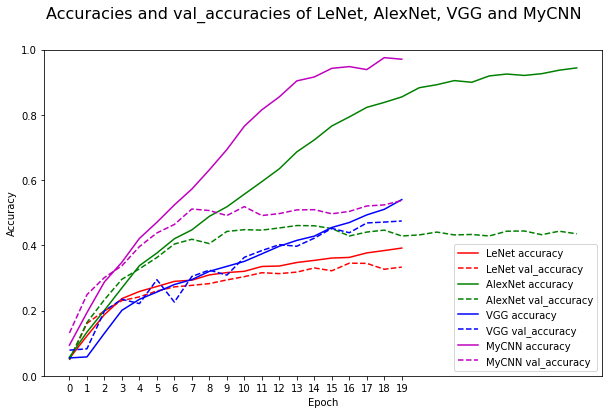

In [ ]:
# Set figure size
plt.rcParams["figure.figsize"] = (10, 6)

# Set figure title
plt.suptitle('Accuracies and val_accuracies of LeNet, AlexNet, VGG and MyCNN', fontsize=16)

plt.plot(history_LeNet_1.history['accuracy'], 'r-', label='LeNet accuracy')
plt.plot(history_LeNet_1.history['val_accuracy'], 'r--', label ='LeNet val_accuracy')

plt.plot(history_AlexNet_3.history['accuracy'], 'g-', label='AlexNet accuracy')
plt.plot(history_AlexNet_3.history['val_accuracy'], 'g--', label ='AlexNet val_accuracy')

plt.plot(history_VGG_1.history['accuracy'], 'b-', label='VGG accuracy')
plt.plot(history_VGG_1.history['val_accuracy'], 'b--', label ='VGG val_accuracy')

plt.plot(history_MyCNN_1.history['accuracy'], 'm-', label='MyCNN accuracy')
plt.plot(history_MyCNN_1.history['val_accuracy'], 'm--', label ='MyCNN val_accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])

# Set scale in x axis
plt.xticks([epoch for epoch in range(20)])

plt.legend(loc='lower right')

Με βάση το παραπάνω γράφημα, έχουμε ότι στο LeNet και στο VGG CNN το val_accuracy ακολουθεί αρκετά πιστά το accuracy, γεγονός που σημαίνει ότι τα εν λόγω CNN ταξινομούν δεδομένα του train set και του validation set εξίσου αποδοτικά. Αντίθετα, στο AlexNet και MyCNN το accuracy αυξάνεται πολύ ταχύτερα από το val_accuracy, γεγονός που επιβεβαιώνει ότι με το πέρασμα των εποχών το συγκεκριμένο CNN ταξινομεί με αποδοτικότερο τρόπο δεδομένα του train set σε σχέση με αυτά που βρίσκονται στο validation set. Επίσης, για το MyCNN βλέπουμε ότι το accuracy αυξάνεται σταθερά, οπότε στις πρώτες 20 εποχές δεν υπάρχει το πρόβλημα του overfitting.

Στη συνέχεια, ελέγχουμε την αποδοτικότητα των LeNet, AlexNet, VGG και MyCNN όταν τροφοδοτούμε τα εν λόγω δίκτυα με δεδομένα του test set.

In [ ]:
# Load trained models that had been previously saved

# LeNet
LeNet_1 = tf.keras.models.load_model(path + 'LeNet_1.h5')
LeNet_2 = tf.keras.models.load_model(path + 'LeNet_2.h5')
LeNet_3 = tf.keras.models.load_model(path + 'LeNet_3.h5')

# AlexNet
AlexNet_1 = tf.keras.models.load_model(path + 'AlexNet_1.h5')
AlexNet_2 = tf.keras.models.load_model(path + 'AlexNet_2.h5')
AlexNet_3 = tf.keras.models.load_model(path + 'AlexNet_3.h5')

# VGG
VGG_1 = tf.keras.models.load_model(path + 'VGG_1.h5')
VGG_2 = tf.keras.models.load_model(path + 'VGG_2.h5')

# MyCNN
MyCNN_1 = tf.keras.models.load_model(path + 'MyCNN_1.h5')
MyCNN_2 = tf.keras.models.load_model(path + 'MyCNN_2.h5')
MyCNN_3 = tf.keras.models.load_model(path + 'MyCNN_3.h5')


In [ ]:
print('LeNet (batch_size = 32)')
LeNet_1.evaluate(x_test, y_test)

LeNet (batch_size = 32)
63/63 [==============================] - 2s 7ms/step - loss: 2.0552 - accuracy: 0.3720


[2.05523943901062, 0.3720000088214874]

In [ ]:
print('LeNet (batch_size = 64)')
LeNet_2.evaluate(x_test, y_test)

LeNet (batch_size = 64)
63/63 [==============================] - 0s 3ms/step - loss: 2.1493 - accuracy: 0.3285


[2.149277687072754, 0.32850000262260437]

In [ ]:
print('LeNet (batch_size = 128)')
LeNet_3.evaluate(x_test, y_test)

LeNet (batch_size = 128)
63/63 [==============================] - 0s 3ms/step - loss: 2.2907 - accuracy: 0.2820


[2.290651321411133, 0.28200000524520874]

In [ ]:
print('AlexNet (epochs = 10)')
AlexNet_1.evaluate(x_test, y_test)

AlexNet (epochs = 10)
63/63 [==============================] - 1s 15ms/step - loss: 1.8433 - accuracy: 0.4400


[1.8432822227478027, 0.4399999976158142]

In [ ]:
print('AlexNet (epochs = 20)')
AlexNet_2.evaluate(x_test, y_test)

AlexNet (epochs = 20)
63/63 [==============================] - 1s 13ms/step - loss: 2.9959 - accuracy: 0.0500


[2.995856761932373, 0.05000000074505806]

In [ ]:
print('AlexNet (epochs = 30)')
AlexNet_3.evaluate(x_test, y_test)

AlexNet (epochs = 30)
63/63 [==============================] - 1s 13ms/step - loss: 3.5453 - accuracy: 0.4430


[3.5452821254730225, 0.4429999887943268]

In [ ]:
print('VGG (optimizer = SGD)')
VGG_1.evaluate(x_test, y_test)

VGG (optimizer = SGD)
63/63 [==============================] - 6s 100ms/step - loss: 1.7121 - accuracy: 0.4760


[1.7120754718780518, 0.47600001096725464]

In [ ]:
print('VGG (optimizer = Adam)')
VGG_2.evaluate(x_test, y_test)

VGG (optimizer = Adam)
63/63 [==============================] - 5s 81ms/step - loss: 2.9959 - accuracy: 0.0500


[2.995867967605591, 0.05000000074505806]

In [ ]:
print('MyCNN (loss = Sparse Categorical Crossentropy)')
MyCNN_1.evaluate(x_test, y_test)

MyCNN (loss = Sparse Categorical Crossentropy)
63/63 [==============================] - 5s 72ms/step - loss: 5.1635 - accuracy: 0.4510


[5.1635050773620605, 0.45100000500679016]

In [ ]:
print('MyCNN (loss = Poisson)')
MyCNN_2.evaluate(x_test, y_test)

MyCNN (loss = Poisson)
63/63 [==============================] - 1s 7ms/step - loss: 28.5094 - accuracy: 0.0485


[28.50943374633789, 0.048500001430511475]

In [ ]:
print('MyCNN (loss = Kullback - Leibler divergence)')
MyCNN_3.evaluate(x_test, y_test)

MyCNN (loss = Kullback - Leibler divergence)
63/63 [==============================] - 1s 6ms/step - loss: 56.9189 - accuracy: 0.0510


[56.918888092041016, 0.050999999046325684]

Παρατηρούμε και πάλι ότι τα μοντέλα που δίνουν το καλύτερο accuracy είναι το LeNet_1, AlexNet_3, VGG_1 και MyCNN_1, όπου για κάθε CNN η τιμή του accuracy είναι πολύ κοντινή με την αντίστοιχη τιμή του val_accuracy. Βέβαια, αυτό είναι αναμενόμενο, διότι τόσο τα δεδομένα του test set όσο και τα δεδομένα του validation set είναι καινούρια για το νευρωνικό δίκτυο (δηλαδή δεν ανήκουν στο train set), οπότε ταξινομούνται περίπου με τον ίδιο τρόπο.

##### 3.

**Επίδραση του πλήθους των δεδομένων/κλάσεων στην απόδοση του μοντέλου**

Σε σχέση με τα CNN που είδαμε στη διάλεξη του εργαστηρίου και που χρησιμοποιούσαν ως dataset το CIFAR10, δηλαδή ταξινομούσαν τα δεδομένα σε 10 κλάσεις, τα LeNet, AlexNet, VGG και MyCNN που αναπτύχθηκαν παραπάνω πετυχαίνουν αρκετά μικρότερο val_accuracy. Αυτό οφείλεται στο ότι πλέον τα δεδομένα ταξινομούνται σε 20 κλάσεις (και όχι 10), ενώ ταυτόχρονα αυξάνεται σημαντικά και το μέγεθος του train set. Προφανώς, καθώς αυξάνεται το πλήθος των κλάσεων είναι δυσκολότερο το έργο της αποδοτικής ταξινόμησης, ενώ η αύξηση του πλήθους των δεδομένων εισάγει χρονικό overhead, διότι σε κάθε εποχή το CNN εκπαιδεύεται με περισσότερα δεδομένα.

**Επίδραση του αλγόριθμου βελτιστοποίησης (optimizer)**

Κατά την εκπαίδευση των μοντέλων παρατηρήθηκε ότι ο Adam optimizer συγκλίνει σε αξιόλογες τιμές του val_accuracy μετά από μεγάλο πλήθος δοκιμών, ενώ ο SGD συγκλίνει γρηγοτότερα σε μεγάλες τιμές του val_accuracy. Τέλος, στο VGG CNN διαπιστώσαμε ότι ο SGD optimizer δίνει πολύ καλύτερα αποτελέσματα από τον Adam optimizer, όσον αφορά το val_accuracy.

**Επίδραση του μεγέθους δέσμης (batch size)**

Κατά την εκπαίδευση των μοντέλων (και ειδικά του LeNet) παρατηρήθηκε ότι μικρές τιμές του batch_size (π.χ. 32) οδηγούν σε μεγάλες τιμές val_accuracy, ενώ μεγάλες τιμές του batch_size (π.χ. 128) οδηγούν σε γρηγορότερη ολοκλήρωση των εποχών, ωστόσο συγκλίνουν αργότερα σε μεγάλες τιμές val_acc. Βέβαια, πρέπει να έχουμε πάντα υπόψη ότι μικρές τιμές του batch_size απαιτούν λιγότερη μνήμη κατά την εκπαίδευση.

### Ερώτημα 2
---
### Βήμα 1: Έλεγχος υπερεκπαίδευσης

Για τον καλύτερο συνδυασμό που λάβατε από το Ερώτημα 1 για μοντέλο σας  (**MyCNN**) και μόνο, δοκιμάστε διάφορους συνδυασμούς των ακόλουθων τεχνικών για τον έλεγχο της υπερεκπαίδευσης (overfitting), όπως: 
- Πρόωρος τερματισμός (early stopping [tf.keras.callbacks.EarlyStopping](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStoppinghttps://)) 

- Dropout ([Dropout](https://www.tensorflow.org/tutorials/images/classification#dropout))

- Επαύξηση δεδομένων ([Data augmentation](https://www.tensorflow.org/tutorials/images/classification#data_augmentation), [ImageDataGenerator](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator#class_imagedatagenerator)) 

\\
, ώστε το μοντέλο σας να γενικεύει καλύτερα.

---
### Βήμα 2: Αξιολόγηση
Αξιολογήστε της ορθότητας για το validation και το test set σας.

#### Βήμα 1: Έλεγχος υπερεκπαίδευσης (overfitting)

##### **Dropout**

Χάρη στη μέθοδο Dropout μπορεί να αντιμετωπιστεί αποτελεσματικά το πρόβλημα του overfitting, καθώς και να βελτιωθεί η ικανότητα γενίκευσης (generalization) ενός Νευρωνικού Δικτύου με υπολογιστικά φθηνό τρόπο. Με τη μέθοδο Dropout μπορούμε να εκπαιδεύσουμε **παράλληλα** ένα μεγάλο αριθμό Νευρωνικών Δικτύων με διαφορετική αρχιτεκτονική το καθένα. Κατά την εκπαίδευση, ορισμένοι νευρώνες του δικτύου αγνοούνται κατά τυχαίο τρόπο (μαζί με τις εξερχόμενες και εισερχόμενες προς αυτούς νοητές ακμές). Αυτό πρακτικά σημαίνει ότι οι διασυνδέσεις ανάμεσα στους νευρώνες ελαττώνονται στο δίκτυο, με αποτέλεσμα κάθε νευρώνας να αποκτά μεγαλύτερη αυτονομία, με την έννοια ότι οι τιμές βάρους που υπολογίζει παύουν να βασίζονται στις εξόδους γειτονικών νευρώνων. Έτσι, εσφαλμένες τιμές βαρών που προωθούνται από προηγούμενα layers και έχουν ως συνέπεια το overfitting, διορθώνονται από τους «ανεξάρτητους» νευρώνες, οι οποίοι αυξάνουν την ικανότητα γενίκευσης του μοντέλουν και το καθιστούν πλέον πιο εύρωστο (robust).

In [ ]:
# Function that designs MyCNN model architecture (using Dropout regularization) for input_shape = (32, 32, 3)

def MyCNN():
  model = models.Sequential()

  model.add(layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu', input_shape=x_train[1].shape))
  model.add(layers.MaxPool2D(pool_size=2, strides=2))
  model.add(layers.Dropout(0.1))
  model.add(layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
  model.add(layers.MaxPool2D(pool_size=2, strides=2))
  model.add(layers.Dropout(0.1))
  model.add(layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
  model.add(layers.MaxPool2D(pool_size=2, strides=2))
  model.add(layers.Dropout(0.1))
  model.add(layers.Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
  model.add(layers.MaxPool2D(pool_size=2, strides=2))
  model.add(layers.Dropout(0.1))
  model.add(layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
  model.add(layers.MaxPool2D(pool_size=2, strides=2))
  model.add(layers.Dropout(0.1))
  
  model.add(layers.Flatten())

  model.add(layers.Dense(1024, activation='relu'))
  model.add(layers.Dropout(0.1))
  model.add(layers.Dense(200, activation='relu'))
  model.add(layers.Dropout(0.1))

  # The number of neurons in the last layer must be equal to the number of classes (that is, 20)
  model.add(layers.Dense(20, activation='softmax'))

  return model

In [ ]:
# Build and display MyCNN model's full architecture

MyCNN().summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 32, 32, 128)       3584      
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 16, 16, 128)      0         
 g2D)                                                            
                                                                 
 dropout_40 (Dropout)        (None, 16, 16, 128)       0         
                                                                 
 conv2d_33 (Conv2D)          (None, 16, 16, 256)       295168    
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 8, 8, 256)        0         
 g2D)                                                            
                                                                 
 dropout_41 (Dropout)        (None, 8, 8, 256)        

In [ ]:
myCNN = MyCNN()

# Compile MyCNN model
myCNN.compile(optimizer='adam', loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

# Train MyCNN model
history_myCNN_dropout = myCNN.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_val, y_val))

# Save the trained MyCNN model
myCNN.save(path + 'MyCNN_dropout.h5')

Epoch 1/20
67/67 [==============================] - 3s 31ms/step - loss: 2.8669 - accuracy: 0.0873 - val_loss: 2.7760 - val_accuracy: 0.1333
Epoch 2/20
67/67 [==============================] - 2s 27ms/step - loss: 2.6497 - accuracy: 0.1516 - val_loss: 2.5244 - val_accuracy: 0.1880
Epoch 3/20
67/67 [==============================] - 2s 27ms/step - loss: 2.4319 - accuracy: 0.2121 - val_loss: 2.2451 - val_accuracy: 0.2760
Epoch 4/20
67/67 [==============================] - 2s 28ms/step - loss: 2.2123 - accuracy: 0.2860 - val_loss: 2.1994 - val_accuracy: 0.3073
Epoch 5/20
67/67 [==============================] - 2s 27ms/step - loss: 2.0533 - accuracy: 0.3436 - val_loss: 2.0621 - val_accuracy: 0.3480
Epoch 6/20
67/67 [==============================] - 2s 27ms/step - loss: 1.8964 - accuracy: 0.3896 - val_loss: 1.8721 - val_accuracy: 0.4153
Epoch 7/20
67/67 [==============================] - 2s 27ms/step - loss: 1.7319 - accuracy: 0.4438 - val_loss: 1.8544 - val_accuracy: 0.4140
Epoch 8/20
67

Παρατηρούμε ότι με τη χρήση του Dropout το val_accuracy του MyCNN βελτιώνεται κατά 1% (από 53% σε 54%). Το πρόβλημα του overfitting εκ πρώτης όψεως φαίνεται να μην αντιμετωπίζεται, ωστόσο παρατηρούμε ότι μετά το πέρας της εκπαίδευσης το accuracy έχει τιμή 84%, ενώ στο ερώτημα 1 το accuracy έφτανε την τιμή 97%, που σημαίνει ότι το μοντέλος μας πλέον οι τιμές accuracy και val_accuracy έχουν έρθει πιο κοντά, άρα το overfitting ελαττώνεται κατά κάποιο τρόπο.

##### **Early Stopping**

Το EarlyStopping αποτελεί μια ειδική κατηγορία callback, η οποία τίθεται ως παράμετρος στη μέθοδο `models.fit()` και επιτρέπει τον πρόωρο τερματισμό της εκπαίδευσης του Νευρωνικού Δικτύου. Κριτήριο τερματισμού αποτελεί η επίδοση μιας μετρικής (που επιλέγεται μέσω της παραμέτρου `monitor`) η οποία συνήθως εκφράζει loss/val_loss ή accuracy/val_accuracy. Για παράδειγμα, αν θέσουμε `monitor=val_accuracy`, τότε η εκπαίδευση του Νευρωνικού Δικτύου θα σταματήσει αμέσως μόλις εντοπιστεί "χειρότερη" τιμή val_accuracy, δηλαδή μικρότερη από την τρέχουσα. Επίσης, μέσω της παραμέτρου `patience` μπορούμε να ελέγξουμε την ανοχή του EarlyStopping callback ως προς την αμεσότητα στην οποία θα τερματίσει την εκπαίδευση. Δηλαδή, αν θέσουμε `patience=3` και `monitor=val_accuracy`, αυτό σημαίνει ότι η εκπαίδευση του Νευρωνικού Δικτύου θα σταματήσει στην περίπτωση όπου το δίκτυο δεν ανιχνεύσει βελτίσωση στο val_accuracy για διάστημα 3 εποχών. Παρακάτω πειραματιζόμαστε με το EarlyStopping callback θέτοντας `monitor=val_accuracy` και `patience=3`.

In [ ]:
myCNN_early = MyCNN()

# Compile MyCNN model
myCNN_early.compile(optimizer='adam', loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

# Configure EarlyStopping Callback
early = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)

# Train MyCNN model
history_myCNN_early = myCNN_early.fit(x_train, y_train, epochs=30, batch_size=128, validation_data=(x_val, y_val), callbacks = early)

# Save the trained MyCNN model
myCNN.save(path + 'MyCNN_early.h5')

Epoch 1/30
67/67 [==============================] - 3s 32ms/step - loss: 2.9207 - accuracy: 0.0782 - val_loss: 2.8027 - val_accuracy: 0.1067
Epoch 2/30
67/67 [==============================] - 2s 27ms/step - loss: 2.6837 - accuracy: 0.1720 - val_loss: 2.5017 - val_accuracy: 0.2293
Epoch 3/30
67/67 [==============================] - 2s 27ms/step - loss: 2.3275 - accuracy: 0.2572 - val_loss: 2.3297 - val_accuracy: 0.2733
Epoch 4/30
67/67 [==============================] - 2s 28ms/step - loss: 2.1421 - accuracy: 0.3172 - val_loss: 2.0151 - val_accuracy: 0.3353
Epoch 5/30
67/67 [==============================] - 2s 27ms/step - loss: 1.9733 - accuracy: 0.3709 - val_loss: 1.9585 - val_accuracy: 0.3693
Epoch 6/30
67/67 [==============================] - 2s 27ms/step - loss: 1.8544 - accuracy: 0.4020 - val_loss: 1.8768 - val_accuracy: 0.4100
Epoch 7/30
67/67 [==============================] - 2s 27ms/step - loss: 1.6971 - accuracy: 0.4505 - val_loss: 1.7248 - val_accuracy: 0.4440
Epoch 8/30
67

Παρατηρούμε ότι η επαίδευση του MyCNN τερματίζεται στην εποχή 17, λόγω του EarlyStopping callback. Πράγματι, παρατηρούμε ότι το μέγεθος val_accuracy δε γνώρισε αύξηση στις τελευταίες 3 εποχές (από 55% στην εποχή 14 έπεσε στο 52% στην εποχή 17). Και πάλι παρατηρούμε ότι οι τιμές accuracy και val_accuracy έχουν έρθει πιο κοντά, άρα το overfitting ελαττώνεται.

##### **Data Augmentation**

Η μέθοδος Data Augmentation αποτελεί κι εκείνη μια τακτική regularization που συμβάλει στην αποτελεσματική μείωση του overfitting κατά την εκπαίδευση ενός Νευρωνικού Δικτύου. Η εν λόγω μέθοδος περιλαμβάνει τη δημιουργία νέων real-world εικόνων (που ανήκουν σαφώς σε υποσύνολο των κλάσεων προς ταξινόμηση) με βάση κάποιους μετασχηματισμούς πάνω στο αρχικό dataset. Οι παραγόμενες εικόνες εμπλουτίζουν το dataset και αυξάνουν την ικανότητα γενίκευσης του Νευρωνικού Δικτύου. Οι μετασχηματισμοί τους οποίους επιλέγουμε να εφαρμόσουμε παρακάτω είναι οι Flip (αντικατοπτρισμός), Rotation (περιστροφή) και Zoom (μεγέθυνση).

In [ ]:
# Data augmentation preprocessing layer that uses Flip, Rotation and Zoom transformations

data_augmentation = models.Sequential(
  [
    layers.RandomFlip("horizontal", input_shape=(32, 32, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.2),
  ]
)

In [ ]:
# Function that designs MyCNN model architecture (using Dropout and Data augmentation regularization) for input_shape = (32, 32, 3)

def MyCNN():
  model = models.Sequential()

  # Extra layers for data augmentation preprocessing
  data_augmentation,
  layers.Rescaling(1./255),

  model.add(layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu', input_shape=x_train[1].shape))
  model.add(layers.MaxPool2D(pool_size=2, strides=2))
  model.add(layers.Dropout(0.1))
  model.add(layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
  model.add(layers.MaxPool2D(pool_size=2, strides=2))
  model.add(layers.Dropout(0.1))
  model.add(layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
  model.add(layers.MaxPool2D(pool_size=2, strides=2))
  model.add(layers.Dropout(0.1))
  model.add(layers.Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
  model.add(layers.MaxPool2D(pool_size=2, strides=2))
  model.add(layers.Dropout(0.1))
  model.add(layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
  model.add(layers.MaxPool2D(pool_size=2, strides=2))
  model.add(layers.Dropout(0.1))
  
  model.add(layers.Flatten())

  model.add(layers.Dense(1024, activation='relu'))
  model.add(layers.Dropout(0.1))
  model.add(layers.Dense(200, activation='relu'))
  model.add(layers.Dropout(0.1))

  # The number of neurons in the last layer must be equal to the number of classes (that is, 20)
  model.add(layers.Dense(20, activation='softmax'))

  return model

In [ ]:
# Build and display MyCNN model's full architecture

MyCNN().summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_67 (Conv2D)          (None, 32, 32, 128)       3584      
                                                                 
 max_pooling2d_63 (MaxPoolin  (None, 16, 16, 128)      0         
 g2D)                                                            
                                                                 
 dropout_89 (Dropout)        (None, 16, 16, 128)       0         
                                                                 
 conv2d_68 (Conv2D)          (None, 16, 16, 256)       295168    
                                                                 
 max_pooling2d_64 (MaxPoolin  (None, 8, 8, 256)        0         
 g2D)                                                            
                                                                 
 dropout_90 (Dropout)        (None, 8, 8, 256)       

In [ ]:
myCNN = MyCNN()

# Configure EarlyStopping Callback
early = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)

# Compile MyCNN model
myCNN.compile(optimizer='adam', loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

# Train MyCNN model
history_myCNN_dropout = myCNN.fit(x_train, y_train, epochs=30, batch_size=128, validation_data=(x_val, y_val), callbacks=early)

# Save the trained MyCNN model
myCNN.save(path + 'MyCNN_augmentation.h5')

Epoch 1/30
67/67 [==============================] - 3s 31ms/step - loss: 2.8426 - accuracy: 0.0938 - val_loss: 2.7171 - val_accuracy: 0.1213
Epoch 2/30
67/67 [==============================] - 2s 28ms/step - loss: 2.6091 - accuracy: 0.1578 - val_loss: 2.4783 - val_accuracy: 0.1833
Epoch 3/30
67/67 [==============================] - 2s 27ms/step - loss: 2.3919 - accuracy: 0.2164 - val_loss: 2.2488 - val_accuracy: 0.2460
Epoch 4/30
67/67 [==============================] - 2s 27ms/step - loss: 2.1953 - accuracy: 0.2879 - val_loss: 2.1280 - val_accuracy: 0.3160
Epoch 5/30
67/67 [==============================] - 2s 27ms/step - loss: 2.0536 - accuracy: 0.3359 - val_loss: 1.9994 - val_accuracy: 0.3680
Epoch 6/30
67/67 [==============================] - 2s 28ms/step - loss: 1.8621 - accuracy: 0.3936 - val_loss: 1.8809 - val_accuracy: 0.3873
Epoch 7/30
67/67 [==============================] - 2s 27ms/step - loss: 1.7560 - accuracy: 0.4345 - val_loss: 1.7241 - val_accuracy: 0.4420
Epoch 8/30
67

Παρατηρούμε ότι η επαίδευση του MyCNN τερματίζεται στην εποχή 18, λόγω του EarlyStopping callback. Πράγματι, παρατηρούμε ότι το μέγεθος val_accuracy δε γνώρισε αύξηση στις τελευταίες 3 εποχές (από 54.4% στην εποχή 15 έπεσε στο 54.1% στην εποχή 18). Τα αποτελέσματα είναι ίδια με προηγουμένως, γεγονός που μας οδηγεί στη διαπίστωση ότι η μέθοδος Data Augmentation δεν επηρεάζει την ικανότητα γενίκευσης του CNN και αυτό ήταν αναμενόμενο, διότι το dataset μας ήταν ήδη αρκετά πλούσιο (10000 εικόνες).

#### Βήμα 2: Αξιολόγηση

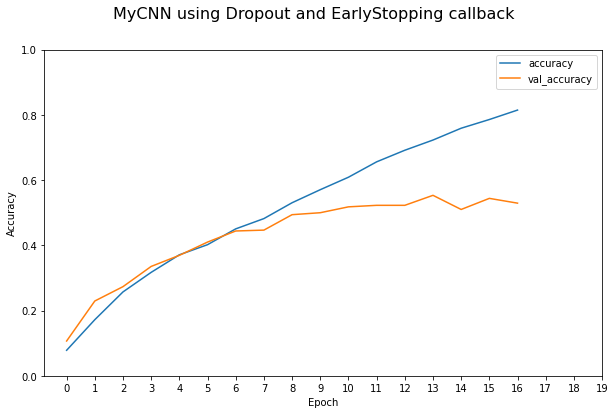

In [ ]:
# Accuracy and val_accuracy of MyCNN (using Dropout and EarlyStopping callback)

# Set figure size
plt.rcParams["figure.figsize"] = (10, 6)

# Set figure title
plt.suptitle('MyCNN using Dropout and EarlyStopping callback', fontsize=16)

plt.plot(history_myCNN_early.history['accuracy'], label='accuracy')
plt.plot(history_myCNN_early.history['val_accuracy'], label ='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])

# Set scale in x axis
plt.xticks([epoch for epoch in range(20)])

plt.legend(loc='upper right')

In [ ]:
MyCNN =  tf.keras.models.load_model(path + 'MyCNN_early.h5')

print("MyCNN using Dropout and Early Stopping callback")

print('Validation set classification information')

loss, accuracy = MyCNN.evaluate(x_val, y_val)

print("Loss: " + str(round(loss, 3)))
print("Accuracy: " + str(round(accuracy, 3)))

print('\nTest set classification information')

loss, accuracy = MyCNN.evaluate(x_test, y_test)

print("Loss: " + str(round(loss, 3)))
print("Accuracy: " + str(round(accuracy, 3)))

MyCNN using Dropout and Early Stopping callback
Validation set classification information
47/47 [==============================] - 0s 6ms/step - loss: 1.9304 - accuracy: 0.5420
Loss: 1.93
Accuracy: 0.542

Test set classification information
63/63 [==============================] - 0s 6ms/step - loss: 1.9162 - accuracy: 0.5525
Loss: 1.916
Accuracy: 0.553


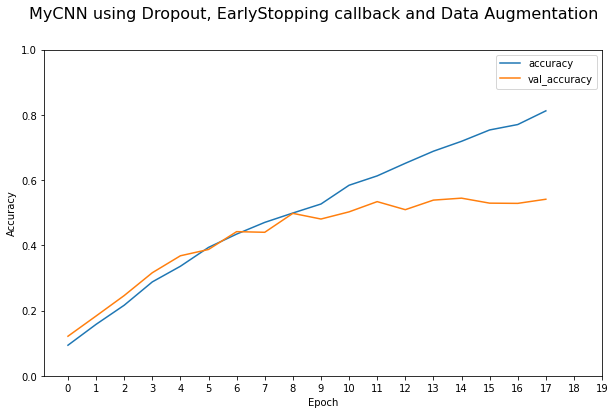

In [ ]:
# Accuracy and val_accuracy of MyCNN (using Dropout, EarlyStopping callback and Data Augmentation)

# Set figure size
plt.rcParams["figure.figsize"] = (10, 6)

# Set figure title
plt.suptitle('MyCNN using Dropout, EarlyStopping callback and Data Augmentation', fontsize=16)

plt.plot(history_myCNN_dropout.history['accuracy'], label='accuracy')
plt.plot(history_myCNN_dropout.history['val_accuracy'], label ='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])

# Set scale in x axis
plt.xticks([epoch for epoch in range(20)])

plt.legend(loc='upper right')

In [ ]:
MyCNN =  tf.keras.models.load_model(path + 'MyCNN_augmentation.h5')

print("MyCNN using Dropout, Early Stopping callback and Data Augmentation")

print('Validation set classification information')

loss, accuracy = MyCNN.evaluate(x_val, y_val)

print("Loss: " + str(round(loss, 3)))
print("Accuracy: " + str(round(accuracy, 3)))

print('\nTest set classification information')

loss, accuracy = MyCNN.evaluate(x_test, y_test)

print("Loss: " + str(round(loss, 3)))
print("Accuracy: " + str(round(accuracy, 3)))

MyCNN using Dropout, Early Stopping callback and Data Augmentation
Validation set classification information
47/47 [==============================] - 0s 6ms/step - loss: 1.8423 - accuracy: 0.5413
Loss: 1.842
Accuracy: 0.541

Test set classification information
63/63 [==============================] - 0s 5ms/step - loss: 1.7581 - accuracy: 0.5585
Loss: 1.758
Accuracy: 0.558


Παρατηρούμε ότι και στις δυο περιπτώσεις η χρήση των μεθόδων Dropout, Data Augmentation και EarlyStopping callback παράγει καλύτερα αποτελέσματα πάνω στο test set (από 45% στο Ερώτημα 1 ανεβήκαμε στο 55%, δηλαδή είχαμε αύξηση 10% στο test_accuracy).

### Ερώτημα 3
---
### Βήμα 1: Μεταφορά γνώσης
Εφαρμόστε μεταφορά γνώσης (transfer learning) στο δικό σας μοντέλο (**MyCNN**), που αξιολογήσατε ως καλύτερο προς την ορθότητα στην αντιμετώπιση της υπερεκπαίδεσης. 

Για το transfer learning, επιλέξτε το [VGG16](https://www.tensorflow.org/api_docs/python/tf/keras/applications/vgg16) για μεταφορά μάθησης.

1. "Παγώστε" τη συνελικτική βάση και εκπαιδεύστε την κεφαλή ταξινόμησης (classification head - σημαία trainable = False).  

2. Εκπαιδέστε μόνο ένα ποσοστό των επιπέδων, το οποίο βρίσκεται προς την έξοδο του δικτύου. Οι σημαίες trainable εδώ θα πρέπει να οριστούν ανά επίπεδο.

3. Αξιολογήστε τα αποτελέσματά σας, βάσει της ορθότητας του validation set και του test set σας.

In [ ]:
from tensorflow.keras import applications

# initialize the vgg16 network without the last three dense layers (include_top flag = false)
vgg16 = tf.keras.applications.VGG16(
    include_top=False, weights='imagenet', input_tensor=None, input_shape=(32,32,3),
    pooling=max, classes=20
)
vgg16.trainable=False 

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
#graphing...

def my_plot(history):

  plt.rcParams["figure.figsize"] = (10, 6)

  # Set figure title
  plt.suptitle('Transfer Learning from VGG16', fontsize=16)

  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label ='val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.ylim([0, 1])

  # Set scale in x axis
  plt.xticks([epoch for epoch in range(20)])

  plt.legend(loc='upper right')


#### First attempt: add on top of the headless vgg16 one Dense(20) layer

In [ ]:
tl_model = models.Sequential([
    vgg16
])

tl_model.add(layers.Flatten())
tl_model.add(layers.Dense(20, activation='softmax'))
tl_model.add(layers.Dropout(0.2))
tl_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 20)                10260     
                                                                 
 dropout (Dropout)           (None, 20)                0         
                                                                 
Total params: 14,724,948
Trainable params: 10,260
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
tl_model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                  metrics=['accuracy'])

history13 = tl_model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_val, y_val))


Epoch 1/20
266/266 [==============================] - 15s 16ms/step - loss: 4.9441 - accuracy: 0.2542 - val_loss: 2.1007 - val_accuracy: 0.3713
Epoch 2/20
266/266 [==============================] - 3s 11ms/step - loss: 4.5387 - accuracy: 0.3546 - val_loss: 1.9207 - val_accuracy: 0.3973
Epoch 3/20
266/266 [==============================] - 3s 11ms/step - loss: 4.4603 - accuracy: 0.3838 - val_loss: 1.8395 - val_accuracy: 0.4340
Epoch 4/20
266/266 [==============================] - 3s 11ms/step - loss: 4.3639 - accuracy: 0.4066 - val_loss: 1.7840 - val_accuracy: 0.4500
Epoch 5/20
266/266 [==============================] - 3s 12ms/step - loss: 4.1651 - accuracy: 0.4268 - val_loss: 1.7529 - val_accuracy: 0.4667
Epoch 6/20
266/266 [==============================] - 3s 12ms/step - loss: 4.3514 - accuracy: 0.4321 - val_loss: 1.7269 - val_accuracy: 0.4767
Epoch 7/20
266/266 [==============================] - 3s 11ms/step - loss: 4.1522 - accuracy: 0.4394 - val_loss: 1.7083 - val_accuracy: 0.476

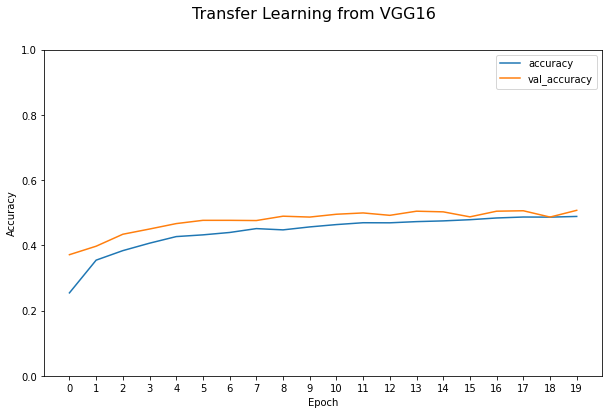

In [ ]:
my_plot(history13)

In [ ]:
print("Transfer Learning - First Attempt")
test_loss, test_accuracy = tl_model.evaluate(x_test, y_test)
validation_loss, validation_accuracy = tl_model.evaluate(x_val, y_val)
print("Test loss:", test_loss)
print("Test accuracy:", test_accuracy)
print("Validation loss:", validation_loss)
print("Validation accuracy:",validation_accuracy)

Transfer Learning - First Attempt
47/47 [==============================] - 1s 12ms/step - loss: 1.6825 - accuracy: 0.5073
Test loss: 1.554834008216858
Test accuracy: 0.5295000076293945
Validation loss: 1.6825003623962402
Validation accuracy: 0.5073333382606506


#### Second attempt: add on top of the headless vgg16 three Dense layers

In [ ]:
tl_model_2 = models.Sequential([
    vgg16
])

tl_model_2.add(layers.Flatten())
tl_model_2.add(layers.Dense(512, activation='relu'))
tl_model_2.add(layers.Dropout(0.2))
tl_model_2.add(layers.Dense(512, activation='relu'))
tl_model_2.add(layers.Dropout(0.2))
tl_model_2.add(layers.Dense(20, activation='softmax'))
tl_model_2.add(layers.Dropout(0.2))
tl_model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 20)               

In [ ]:
tl_model_2.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                  metrics=['accuracy'])

history14 = tl_model_2.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/20
266/266 [==============================] - 5s 13ms/step - loss: 4.6062 - accuracy: 0.3341 - val_loss: 1.9424 - val_accuracy: 0.4213
Epoch 2/20
266/266 [==============================] - 3s 11ms/step - loss: 4.2804 - accuracy: 0.3938 - val_loss: 1.9141 - val_accuracy: 0.4613
Epoch 3/20
266/266 [==============================] - 3s 12ms/step - loss: 3.9967 - accuracy: 0.4284 - val_loss: 1.8157 - val_accuracy: 0.4867
Epoch 4/20
266/266 [==============================] - 3s 11ms/step - loss: 3.8656 - accuracy: 0.4533 - val_loss: 1.8813 - val_accuracy: 0.4993
Epoch 5/20
266/266 [==============================] - 3s 11ms/step - loss: 3.8210 - accuracy: 0.4655 - val_loss: 1.9086 - val_accuracy: 0.4900
Epoch 6/20
266/266 [==============================] - 3s 12ms/step - loss: 3.6227 - accuracy: 0.4912 - val_loss: 2.0230 - val_accuracy: 0.5053
Epoch 7/20
266/266 [==============================] - 3s 13ms/step - loss: 3.7183 - accuracy: 0.4858 - val_loss: 2.0766 - val_accuracy: 0.4900

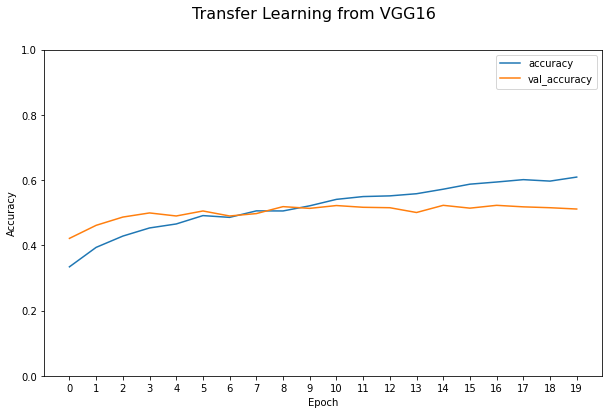

In [ ]:
my_plot(history14)

In [ ]:
print("Transfer Learning - Second Attempt")
test_loss, test_accuracy = tl_model_2.evaluate(x_test, y_test)
validation_loss, validation_accuracy = tl_model_2.evaluate(x_val, y_val)
print("Test loss:", test_loss)
print("Test accuracy:", test_accuracy)
print("Validation loss:", validation_loss)
print("Validation accuracy:",validation_accuracy)

Transfer Learning - Second Attempt
47/47 [==============================] - 1s 13ms/step - loss: 3.1690 - accuracy: 0.5113
Test loss: 2.9566569328308105
Test accuracy: 0.5364999771118164
Validation loss: 3.168952465057373
Validation accuracy: 0.5113333463668823


#### Third attempt: add on top of the headless vgg16 three Dense layers and train only a fraction of them

In [ ]:
tl_model_3 = models.Sequential([
    vgg16
])

tl_model_3.add(layers.Flatten())
tl_model_3.add(layers.Dense(512, activation='relu'))
tl_model_3.add(layers.Dropout(0.2))
tl_model_3.add(layers.Dense(512, activation='relu', trainable=False))
tl_model_3.add(layers.Dropout(0.2))
tl_model_3.add(layers.Dense(20, activation='softmax'))
tl_model_3.add(layers.Dropout(0.2))
tl_model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 512)               262656    
                                                                 
 dropout_5 (Dropout)         (None, 512)               0         
                                                                 
 dense_6 (Dense)             (None, 20)               

In [ ]:
tl_model_3.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                  metrics=['accuracy'])

history15 = tl_model_3.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/20
266/266 [==============================] - 5s 13ms/step - loss: 4.6521 - accuracy: 0.3156 - val_loss: 1.8174 - val_accuracy: 0.4480
Epoch 2/20
266/266 [==============================] - 3s 11ms/step - loss: 4.3064 - accuracy: 0.3799 - val_loss: 1.7955 - val_accuracy: 0.4453
Epoch 3/20
266/266 [==============================] - 3s 11ms/step - loss: 4.2531 - accuracy: 0.4075 - val_loss: 1.7877 - val_accuracy: 0.4753
Epoch 4/20
266/266 [==============================] - 3s 12ms/step - loss: 4.0786 - accuracy: 0.4262 - val_loss: 1.7681 - val_accuracy: 0.4920
Epoch 5/20
266/266 [==============================] - 3s 12ms/step - loss: 3.9961 - accuracy: 0.4433 - val_loss: 1.7491 - val_accuracy: 0.4940
Epoch 6/20
266/266 [==============================] - 3s 11ms/step - loss: 4.0009 - accuracy: 0.4471 - val_loss: 1.7738 - val_accuracy: 0.4973
Epoch 7/20
266/266 [==============================] - 3s 11ms/step - loss: 3.9008 - accuracy: 0.4647 - val_loss: 1.7398 - val_accuracy: 0.5140

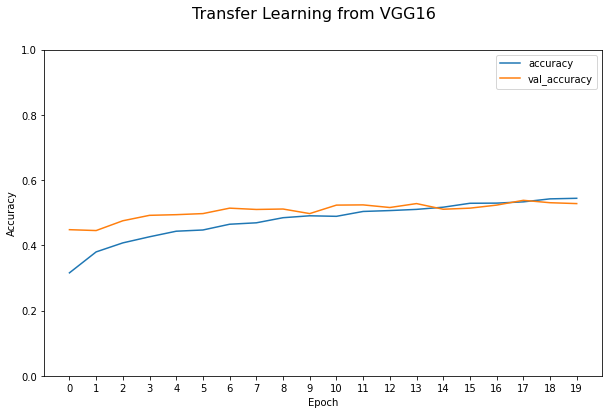

In [ ]:
my_plot(history15)

In [ ]:
print("Transfer Learning - Third Attempt")
test_loss, test_accuracy = tl_model_3.evaluate(x_test, y_test)
validation_loss, validation_accuracy = tl_model_3.evaluate(x_val, y_val)
print("Test loss:", test_loss)
print("Test accuracy:", test_accuracy)
print("Validation loss:", validation_loss)
print("Validation accuracy:",validation_accuracy)

Transfer Learning - Third Attempt
47/47 [==============================] - 0s 9ms/step - loss: 2.0142 - accuracy: 0.5280
Test loss: 1.8330119848251343
Test accuracy: 0.5429999828338623
Validation loss: 2.0141546726226807
Validation accuracy: 0.527999997138977


#### Fourth attempt: freeze only a fraction of the layers of vgg16 (freeze_layers = 15)

In [ ]:
from tensorflow.keras import applications

freeze_layers = 15
# initialize the vgg16 network without the last three dense layers (include_top flag = false)
vgg16 = tf.keras.applications.VGG16(
    include_top=False, weights='imagenet', input_tensor=None, input_shape=(32,32,3),
    pooling=max, classes=20
)

for layer in vgg16.layers[:freeze_layers]:
  layer.trainable = False

In [ ]:
tl_model_4 = models.Sequential([
    vgg16
])

tl_model_4.add(layers.Flatten())
tl_model_4.add(layers.Dense(512, activation='relu'))
tl_model_4.add(layers.Dropout(0.2))
tl_model_4.add(layers.Dense(512, activation='relu'))
tl_model_4.add(layers.Dropout(0.2))
tl_model_4.add(layers.Dense(20, activation='softmax'))
tl_model_4.add(layers.Dropout(0.2))
tl_model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 512)               262656    
                                                                 
 dropout_7 (Dropout)         (None, 512)               0         
                                                                 
 dense_8 (Dense)             (None, 512)               262656    
                                                                 
 dropout_8 (Dropout)         (None, 512)               0         
                                                                 
 dense_9 (Dense)             (None, 20)               

In [ ]:
tl_model_4.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                  metrics=['accuracy'])

history16 = tl_model_4.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/20
266/266 [==============================] - 7s 19ms/step - loss: 5.0417 - accuracy: 0.1722 - val_loss: 2.0463 - val_accuracy: 0.3440
Epoch 2/20
266/266 [==============================] - 5s 18ms/step - loss: 4.3888 - accuracy: 0.3318 - val_loss: 2.1831 - val_accuracy: 0.3487
Epoch 3/20
266/266 [==============================] - 5s 18ms/step - loss: 4.2448 - accuracy: 0.3681 - val_loss: 1.9354 - val_accuracy: 0.4567
Epoch 4/20
266/266 [==============================] - 5s 17ms/step - loss: 3.8735 - accuracy: 0.4258 - val_loss: 2.0479 - val_accuracy: 0.4700
Epoch 5/20
266/266 [==============================] - 5s 17ms/step - loss: 3.9008 - accuracy: 0.4404 - val_loss: 2.0204 - val_accuracy: 0.4873
Epoch 6/20
266/266 [==============================] - 5s 18ms/step - loss: 3.6193 - accuracy: 0.4605 - val_loss: 1.9607 - val_accuracy: 0.5087
Epoch 7/20
266/266 [==============================] - 5s 18ms/step - loss: 3.5828 - accuracy: 0.4799 - val_loss: 2.0151 - val_accuracy: 0.5340

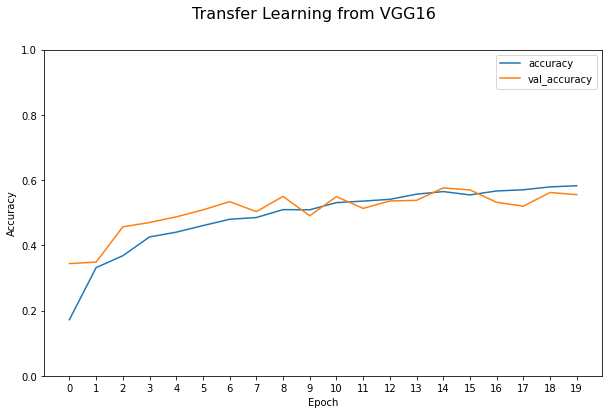

In [ ]:
my_plot(history16)

In [ ]:
print("Transfer Learning - First Attempt")
test_loss, test_accuracy = tl_model_4.evaluate(x_test, y_test)
validation_loss, validation_accuracy = tl_model_4.evaluate(x_val, y_val)
print("Test loss:", test_loss)
print("Test accuracy:", test_accuracy)
print("Validation loss:", validation_loss)
print("Validation accuracy:",validation_accuracy)

Transfer Learning - First Attempt
47/47 [==============================] - 1s 11ms/step - loss: 2.4721 - accuracy: 0.5553
Test loss: 2.5249688625335693
Test accuracy: 0.5410000085830688
Validation loss: 2.472097873687744
Validation accuracy: 0.5553333163261414


Στα παραπάνω αποτελέσματα παρατηρούμε ότι όσον αφορά τα val_accuracy και test_accuracy πετυχαίνουμε καλύτερες τιμές συγκριτικά με αυτά που είχαμε στα ερωτήματα 1 και 2.

## Διαχείριση μνήμης (TFRecord)
Η φόρτωση δεδομένων με τον τρόπο που το κάναμε παραπάνω στο απλό παράδειγμα υλοποίησης είναι πολύ βολική αλλά δεν είναι αποτελεσματική ως προς τη διαχείριση της μνήμης. Συγκεκριμένα, με τον τρόπο αυτό, τα δεδομένα αποθηκεύονται απευθείας σε μεταβλητές, οι οποίες όλες μαζί καταλαμβάνουν τη RAM της CPU ή της GPU, κάτι που κάνει αδύνατη τη διαχείριση μεγάλων datasets ή τον μεταχηματισμό των δεδομένων όπως όταν κάνουμε αύξηση δεδομένων (data augmentation).

Για να παρακαμφθεί αυτό το πρόβλημα, υπάρχει η δυνατότητα της σειριοποίησης των δεδομένων (serialization) και της αποθήκευσής τους σε αρχεία μεσαίου μεγέθους (κάποιων MB) τα οποία μπορούν να αναγνωστούν γραμμικά.

Το φορμάτ TFRecord είναι ένα φορμάτ που επιτρέπει την αποθήκευση σειράς δυαδικών εγγραφών. Διαβάστε σχετικά για το [TFRecord and tf.Example](https://www.tensorflow.org/tutorials/load_data/tfrecord) και [tf.data: Build TensorFlow input pipelines](https://www.tensorflow.org/guide/data). 

Σημειώστε ότι με τη μέθοδο αυτή θα πρέπει να γίνει import η `tensorflow_datasets` και να χρησιμοποιήσουμε την `tfds.load` ώστε να αποθηκευθεί το σύνολο δεδομένων σε αρχεία tfrecord στο δίσκο (δείτε [εδώ](https://colab.research.google.com/github/tensorflow/datasets/blob/master/docs/overview.ipynb) ένα παράδειγμα). Φυσικά μπορούμε να μετατρέψουμε και τα πρωτογενή δεδομένα (raw data) του dataset όπως αρχεία jpg σε φορματ tfrecord όπως [εδώ](https://towardsdatascience.com/working-with-tfrecords-and-tf-train-example-36d111b3ff4d).
